# LIBRERIAS

In [3]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# IMPORTA LOS DATOS

(582, 941)


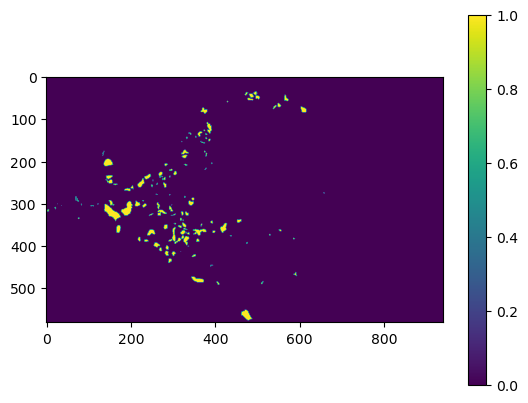

In [4]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
print(inventario.shape)
plt.imshow(inventario)
plt.colorbar();

In [5]:
np.unique(inventario)

array([0, 1], dtype=uint8)

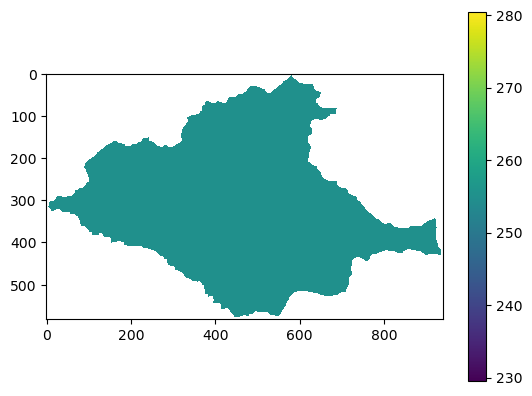

In [6]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

In [7]:
np.unique(msk)

array([255.,  nan])

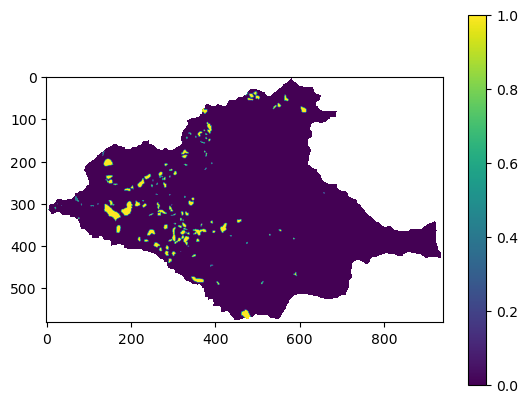

In [8]:
inventario=msk*inventario
inventario=np.where(inventario==255,1,inventario)
plt.imshow(inventario)
plt.colorbar();

In [9]:
np.unique(inventario)

array([ 0.,  1., nan])

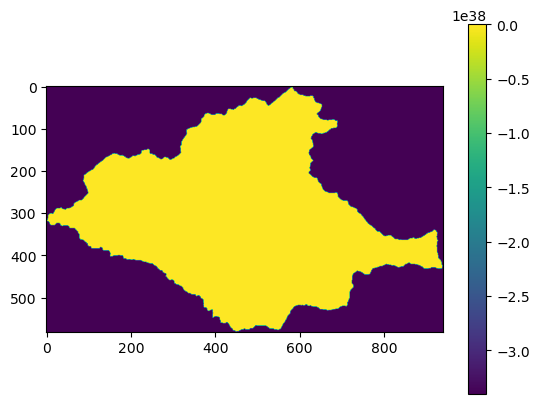

In [116]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

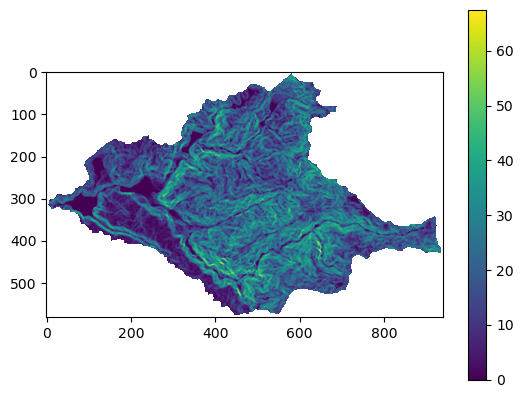

In [117]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [73]:
type(pendiente)

numpy.ndarray

In [74]:
np.shape(pendiente)

(582, 941)

In [75]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

(259233,)

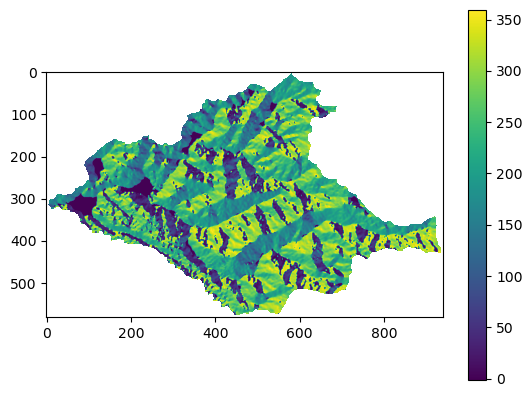

In [15]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

(259233,)

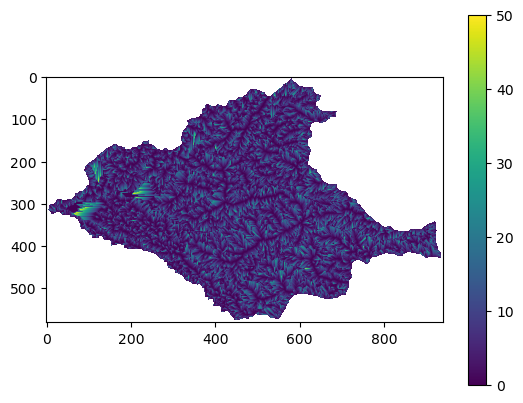

In [16]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/FA.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>50,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

In [17]:
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

(259233,)

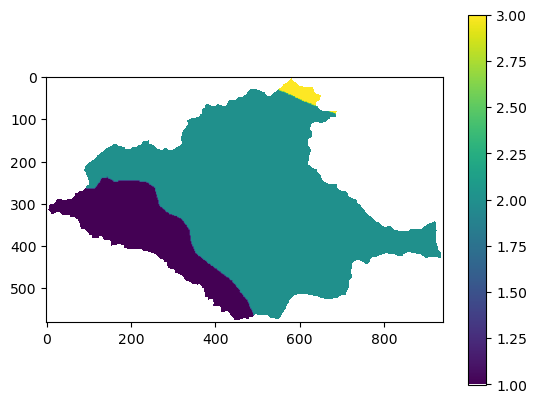

In [18]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/GEOLOG%C3%8DA.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia<1,np.nan,geologia)
geologia=np.where(geologia>15,np.nan,geologia)
geologia=np.where(geologia==15,2,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [19]:
np.unique(geologia)

array([ 1.,  2.,  3., nan])

(259233,)

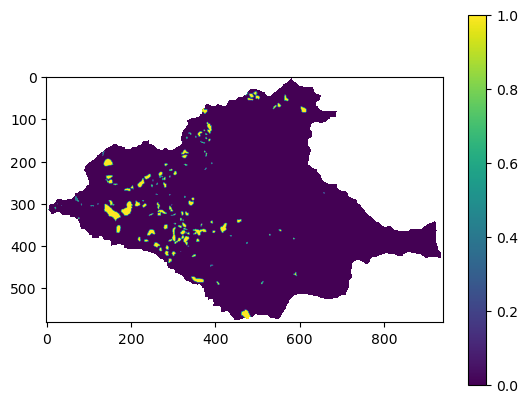

In [20]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

(259233,)

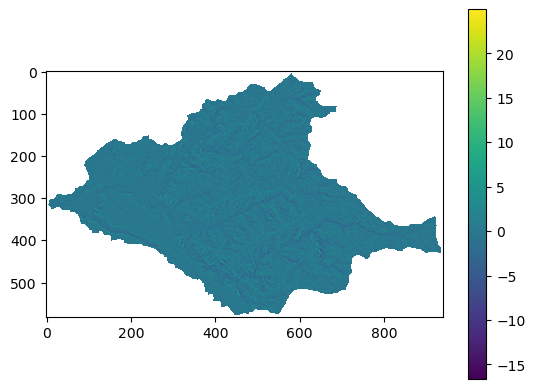

In [21]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Curvatura.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-16.64,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura.shape
curvatura_vector_MenM.shape

(259233,)

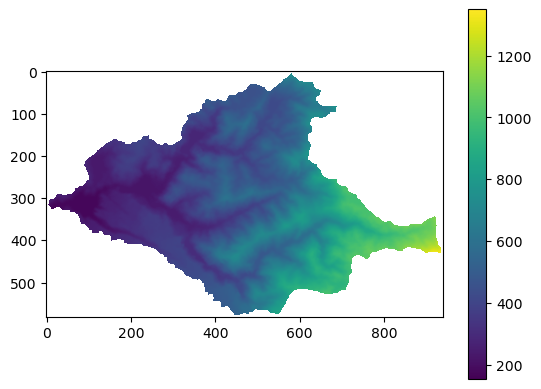

In [22]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/DEM_.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<154,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

# DATA FRAME

In [21]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'elevacion':elevacion_vector_MenM, 'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'aspecto', 'geologia', 'elevacion', 'curvatura']


In [22]:
df.head()

inventario  pendiente     aspecto  geologia  elevacion  curvatura
0         0.0   7.825526  194.036240       3.0      763.0      -0.64
1         0.0   8.447319  170.960526       3.0      763.0      -1.28
2         0.0   8.778080  212.660919       3.0      762.0       1.92
3         0.0   6.302977  185.194427       3.0      762.0       0.64
4         0.0   4.714065  194.036240       3.0      762.0      -0.00

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259233 entries, 0 to 259232
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inventario  259233 non-null  float64
 1   pendiente   259233 non-null  float32
 2   aspecto     259233 non-null  float32
 3   geologia    259233 non-null  float64
 4   elevacion   259233 non-null  float64
 5   curvatura   259233 non-null  float32
dtypes: float32(3), float64(3)
memory usage: 8.9 MB


# MUESTREO DE VARIBLES

In [24]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32645 entries, 8 to 259230
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  32645 non-null  float64
 1   pendiente   32645 non-null  float32
 2   aspecto     32645 non-null  float32
 3   geologia    32645 non-null  float64
 4   elevacion   32645 non-null  float64
 5   curvatura   32645 non-null  float32
dtypes: float32(3), float64(3)
memory usage: 1.4 MB


In [25]:
resumen=df1.describe().T
print(resumen)

              count        mean         std     min         25%         50%  \
inventario  32645.0    0.228733    0.420024    0.00    0.000000    0.000000   
pendiente   32645.0   18.234472   10.844848    0.00    9.697046   17.744671   
aspecto     32645.0  196.685043  109.693253   -1.00  116.939529  216.869904   
geologia    32645.0    1.734630    0.465384    1.00    1.000000    2.000000   
elevacion   32645.0  497.351355  226.056364  155.00  317.000000  448.000000   
curvatura   32645.0   -0.017644    1.373177  -10.88   -0.640000    0.000000   

                   75%          max  
inventario    0.000000     1.000000  
pendiente    25.919943    64.576904  
aspecto     288.434937   359.443756  
geologia      2.000000     3.000000  
elevacion   618.000000  1345.000000  
curvatura     0.640000    19.840000  


In [26]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

pendiente     aspecto  geologia  elevacion  curvatura
0   7.825526  194.036240       3.0      763.0      -0.64
1   8.447319  170.960526       3.0      763.0      -1.28
2   8.778080  212.660919       3.0      762.0       1.92
3   6.302977  185.194427       3.0      762.0       0.64
4   4.714065  194.036240       3.0      762.0      -0.00

In [27]:
matriz_cont=matriz.drop(['geologia'],axis=1)
matriz_cont.head()

pendiente     aspecto  elevacion  curvatura
0   7.825526  194.036240      763.0      -0.64
1   8.447319  170.960526      763.0      -1.28
2   8.778080  212.660919      762.0       1.92
3   6.302977  185.194427      762.0       0.64
4   4.714065  194.036240      762.0      -0.00

## Graficas Generales

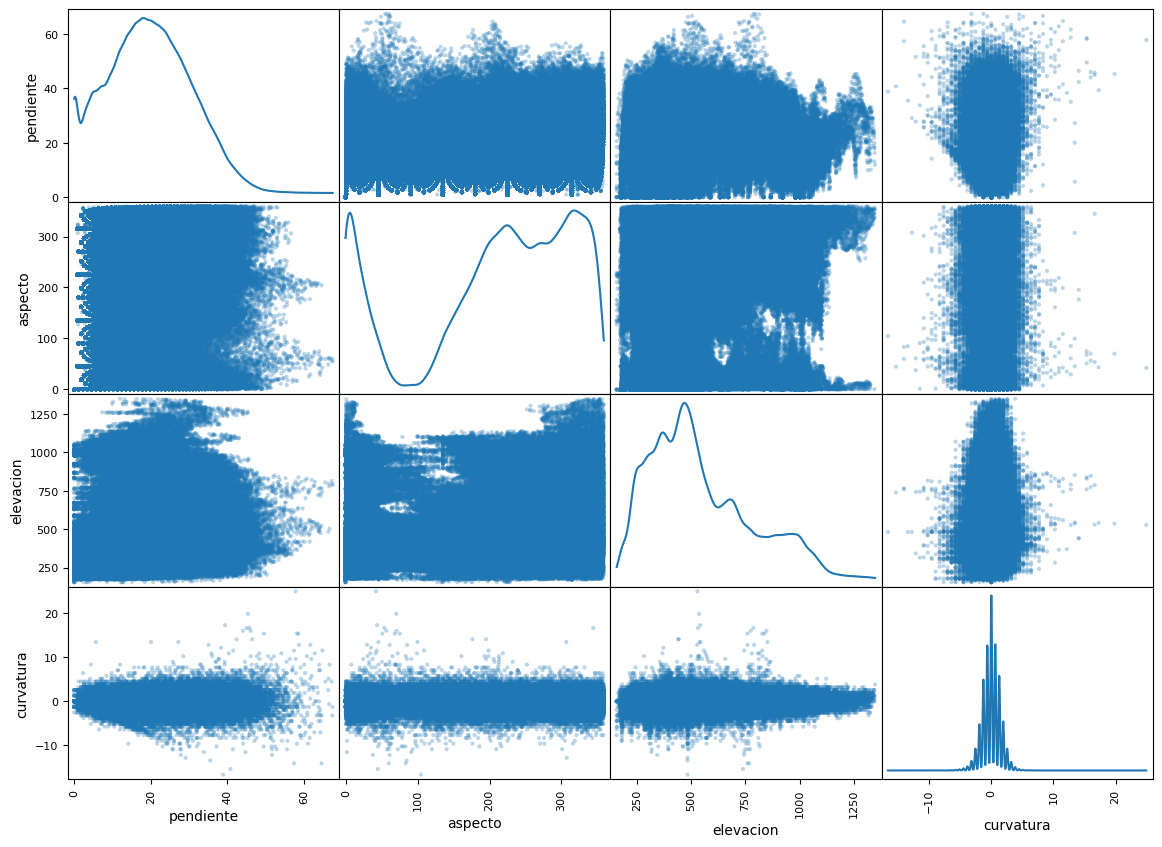

In [28]:
pd.plotting.scatter_matrix(matriz_cont, alpha = 0.3, figsize = (14,10), diagonal='kde');

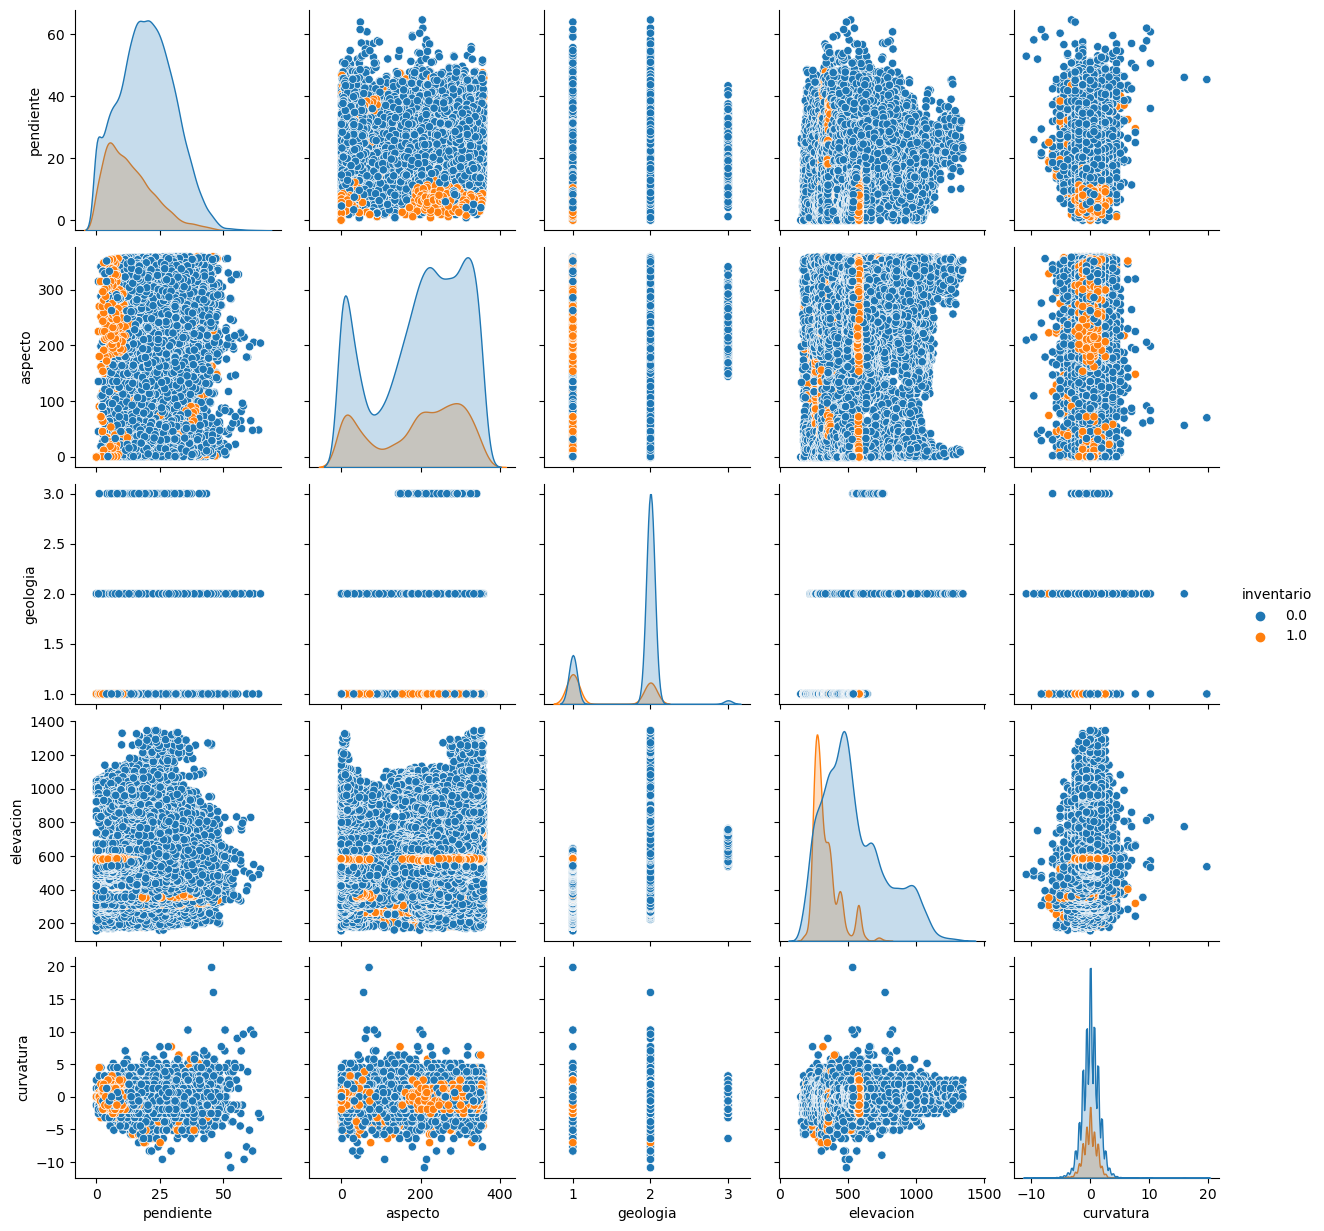

In [29]:
sns.pairplot(df1, hue='inventario');

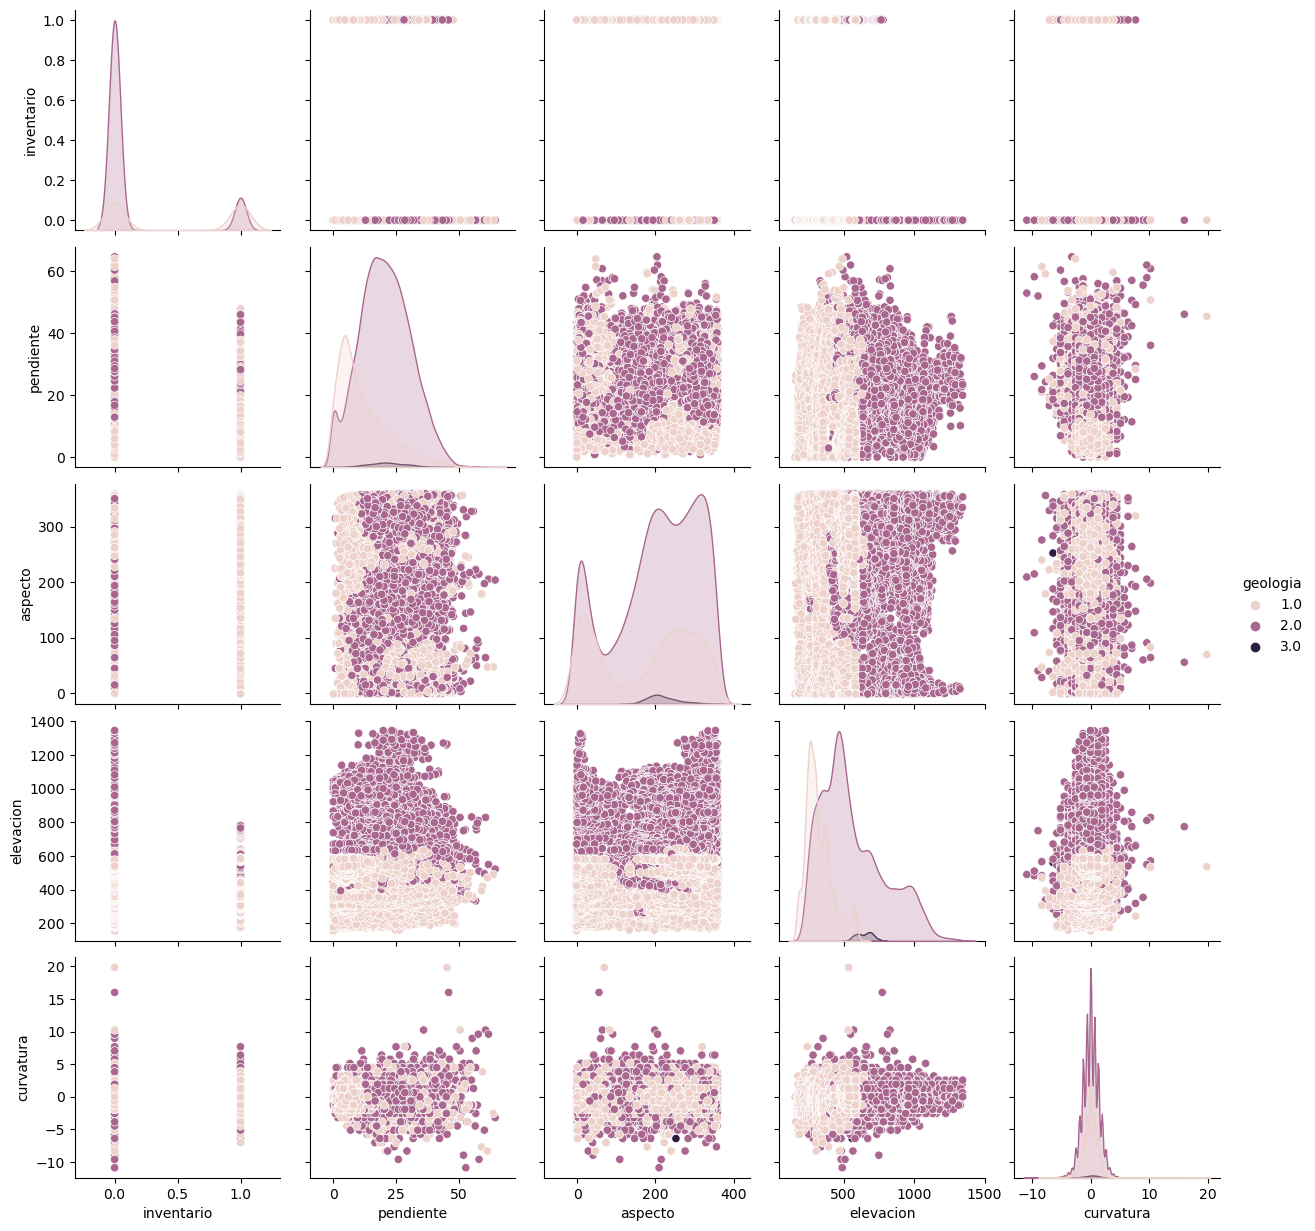

In [30]:
sns.pairplot(df1, hue='geologia');

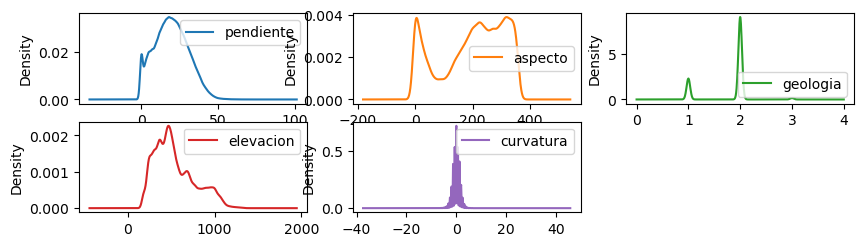

In [31]:
matriz.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 4));

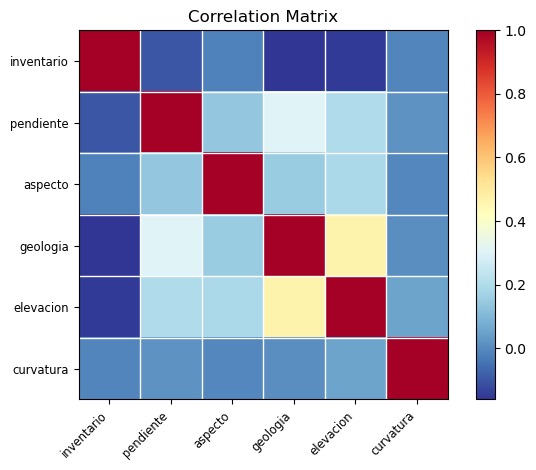

In [32]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

## Análisis univariado

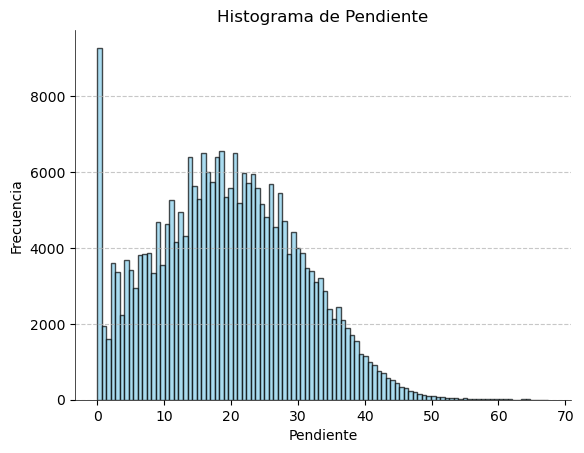

In [33]:
plt.hist(df['pendiente'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

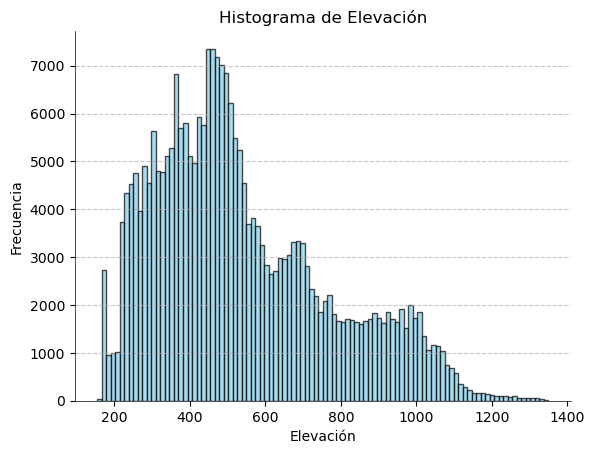

In [34]:
plt.hist(df['elevacion'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Elevación')
plt.xlabel('Elevación')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

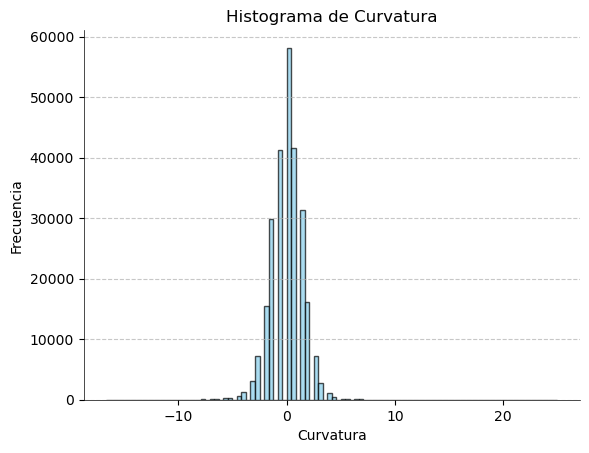

In [35]:
plt.hist(df['curvatura'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Curvatura')
plt.xlabel('Curvatura')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

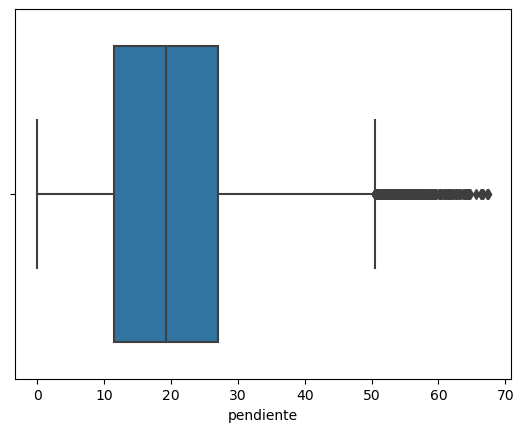

In [36]:
sns.boxplot(x='pendiente', data=df);

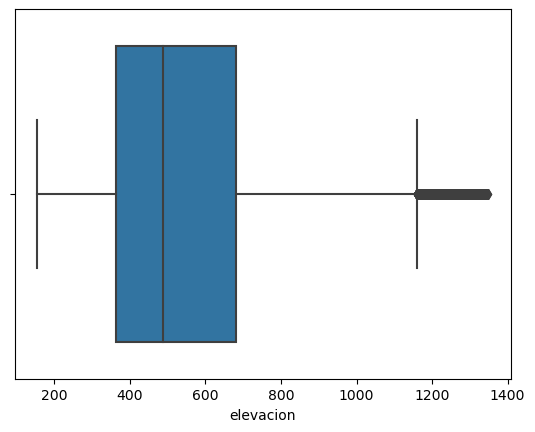

In [37]:
sns.boxplot(x='elevacion', data=df);

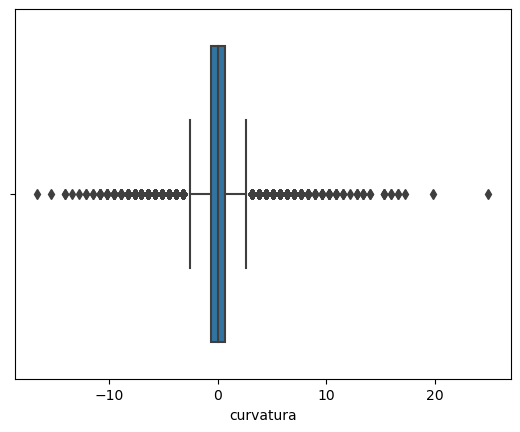

In [38]:
sns.boxplot(x='curvatura', data=df);

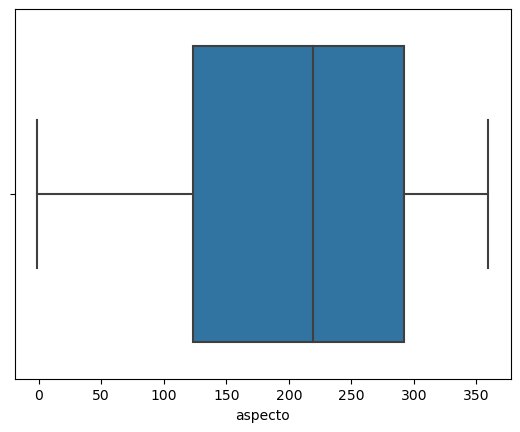

In [39]:
sns.boxplot(x='aspecto', data=df);

<Axes: xlabel='aspecto', ylabel='Density'>

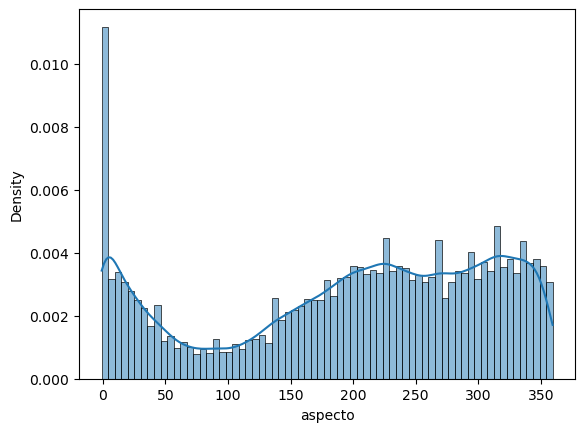

In [40]:
sns.histplot(df["aspecto"], kde=True, stat="density")

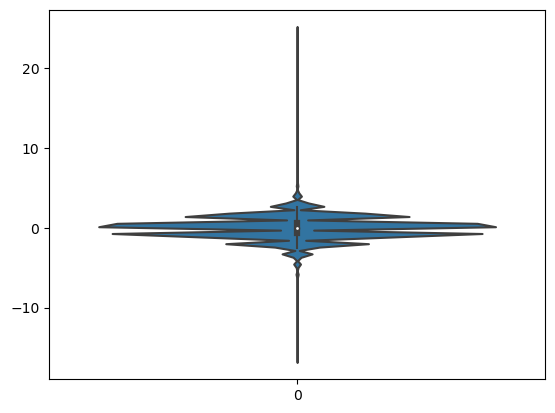

In [41]:
sns.violinplot(df['curvatura']);

## Analisis multivariado

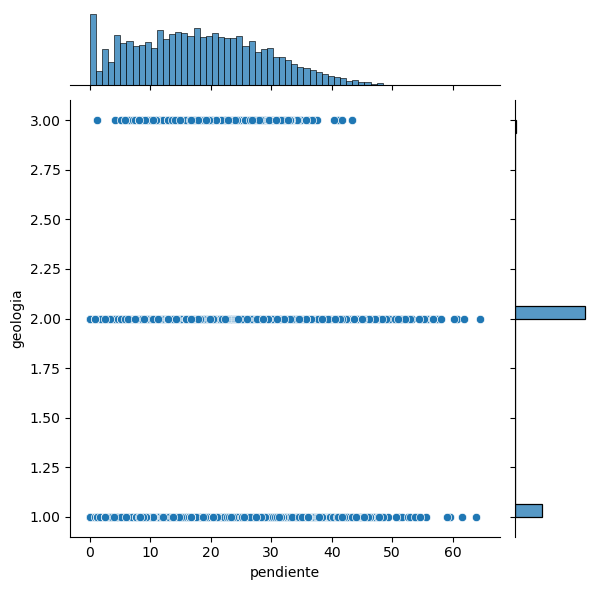

In [42]:
sns.jointplot(x='pendiente', y='geologia', data=df1, kind='scatter');

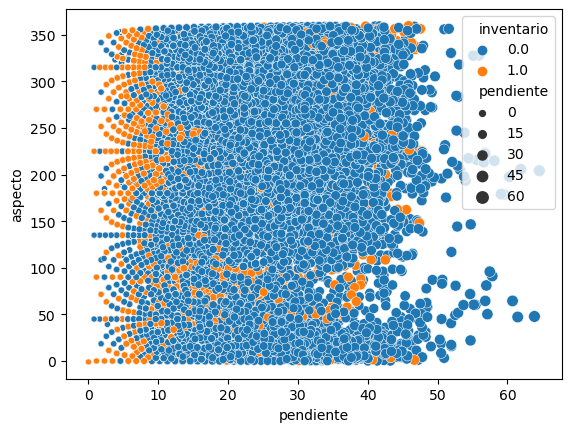

In [43]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

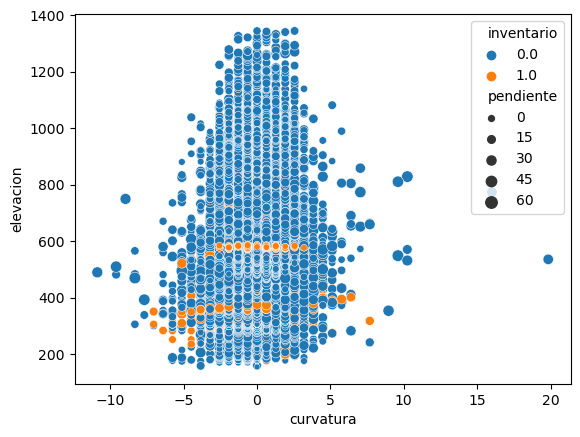

In [44]:
sns.scatterplot(x="curvatura", y="elevacion", hue="inventario", size='pendiente',data=df1);

## Correlación con la variable dependiente

In [45]:
media=df.groupby('inventario').mean()
print(media)

            pendiente     aspecto  geologia   elevacion  curvatura
inventario                                                        
0.0         19.669382  199.259872  1.825536  543.970909  -0.004660
1.0         13.226684  188.496201  1.418776  338.324628  -0.086825


In [46]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

0.0    251766
1.0      7467
Name: inventario, dtype: int64

In [47]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [48]:
si_lands.count()

inventario    7467
pendiente     7467
aspecto       7467
geologia      7467
elevacion     7467
curvatura     7467
dtype: int64

In [49]:
no_lands.count()

inventario    251766
pendiente     251766
aspecto       251766
geologia      251766
elevacion     251766
curvatura     251766
dtype: int64

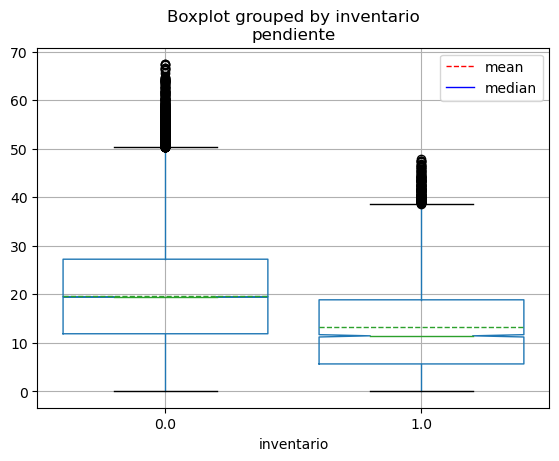

In [50]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [51]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=51.03538817654904, pvalue=0.0)

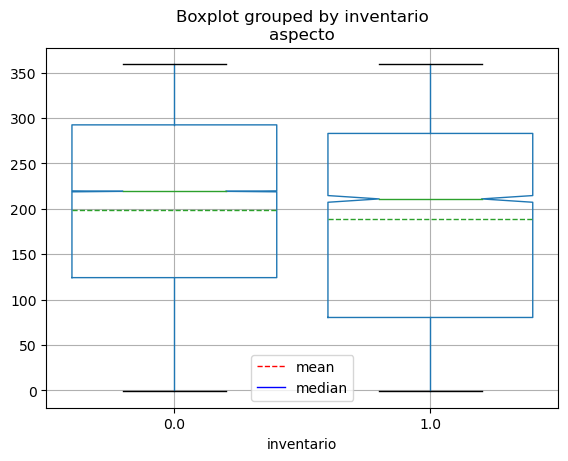

In [52]:
df.boxplot('aspecto', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [53]:
from scipy import stats
stats.ttest_ind(no_lands["aspecto"], si_lands["aspecto"])

Ttest_indResult(statistic=8.323581432499674, pvalue=8.575189086076922e-17)

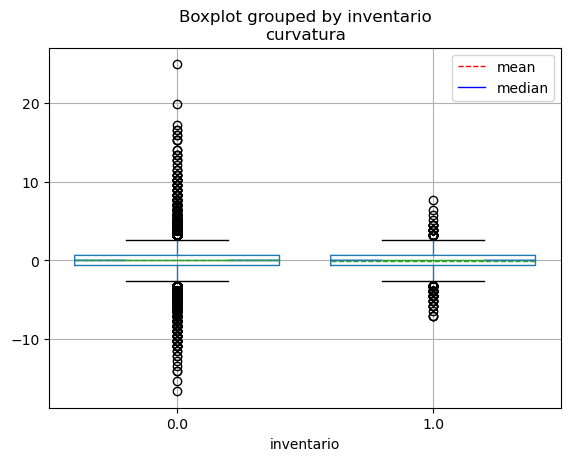

In [54]:
df.boxplot('curvatura', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [55]:
from scipy import stats
stats.ttest_ind(no_lands["curvatura"], si_lands["curvatura"])

Ttest_indResult(statistic=4.919293685714857, pvalue=8.691012282784365e-07)

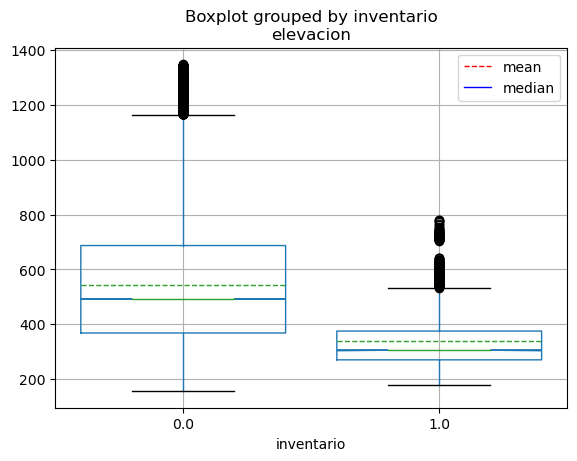

In [56]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [57]:
from scipy import stats
stats.ttest_ind(no_lands["elevacion"], si_lands["elevacion"])

Ttest_indResult(statistic=76.42075822480604, pvalue=0.0)

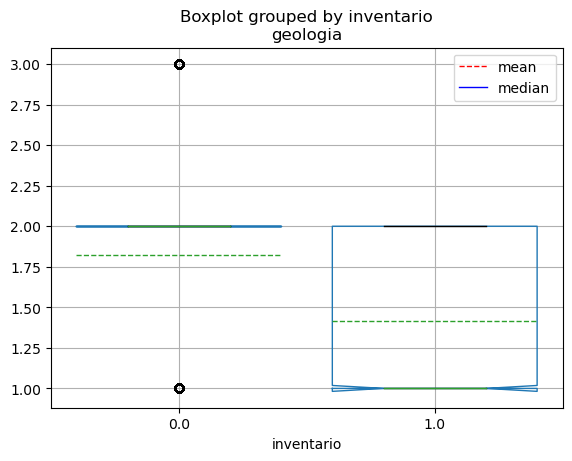

In [58]:
df.boxplot('geologia', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [59]:
from scipy import stats
stats.ttest_ind(no_lands["geologia"], si_lands["geologia"])

Ttest_indResult(statistic=83.14376518401983, pvalue=0.0)

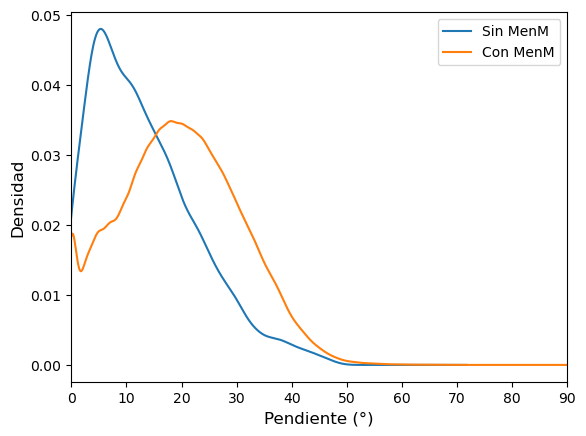

In [60]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

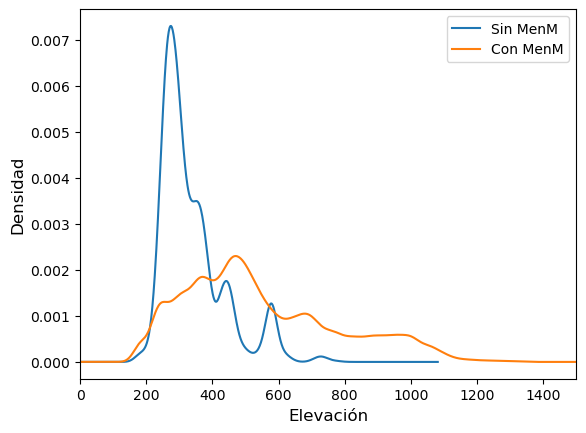

In [61]:
fig, ax = plt.subplots()
si_lands['elevacion'].plot.kde(ax=ax, label='Sin MenM')
no_lands['elevacion'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,1500)
ax.set_xlabel('Elevación', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

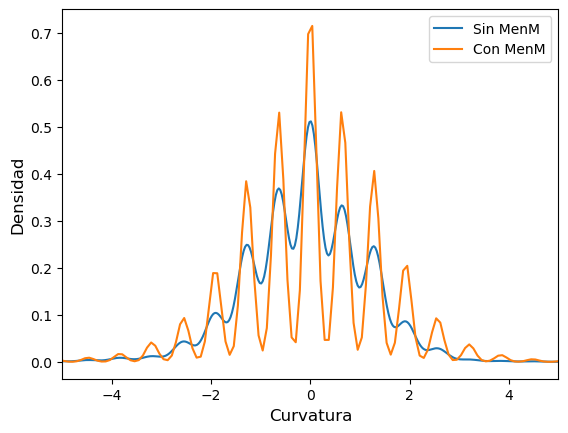

In [62]:
fig, ax = plt.subplots()
si_lands['curvatura'].plot.kde(ax=ax, label='Sin MenM')
no_lands['curvatura'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(-5,5)
ax.set_xlabel('Curvatura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

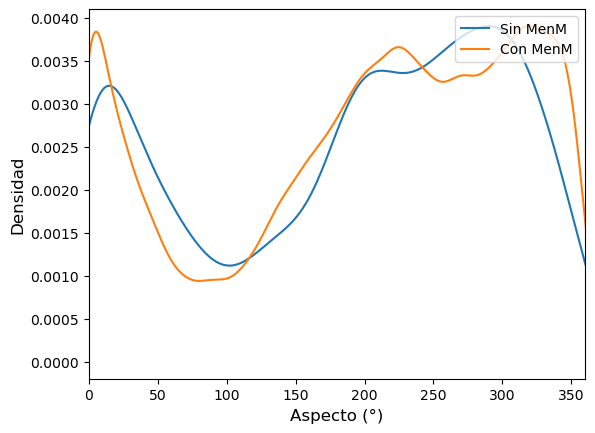

In [63]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

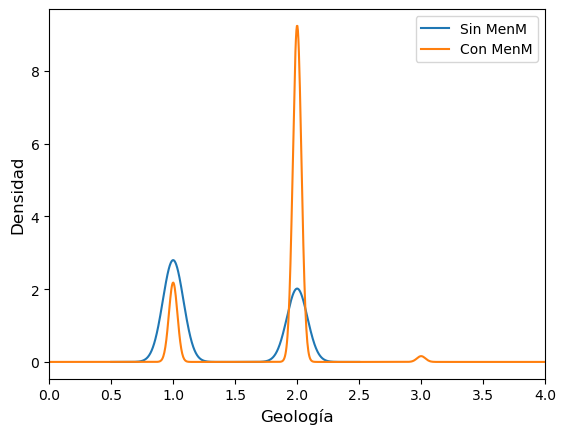

In [64]:
fig, ax = plt.subplots()
si_lands['geologia'].plot.kde(ax=ax, label='Sin MenM')
no_lands['geologia'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,4)
ax.set_xlabel('Geología', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

C:\Users\carol\AppData\Local\Temp\ipykernel_4812\776021121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(si_lands['pendiente'])
C:\Users\carol\AppData\Local\Temp\ipykernel_4812\776021121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_lands['pendiente']);


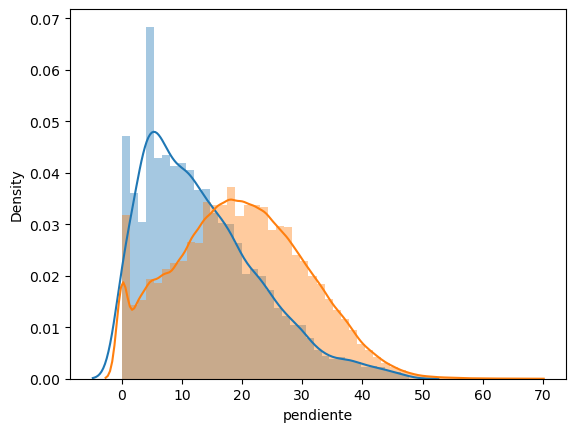

In [65]:
sns.distplot(si_lands['pendiente'])
sns.distplot(no_lands['pendiente']);

# Análisis de Componentes Principales (PCA)

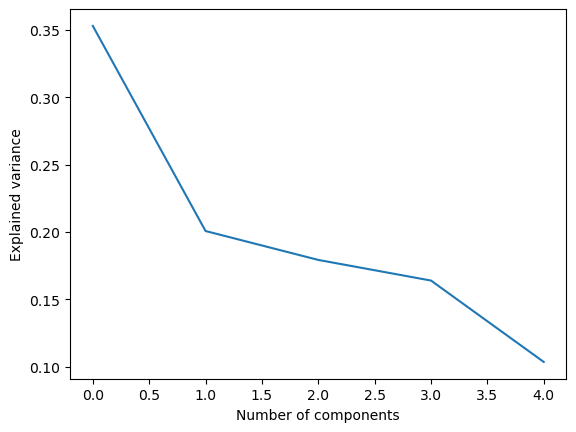

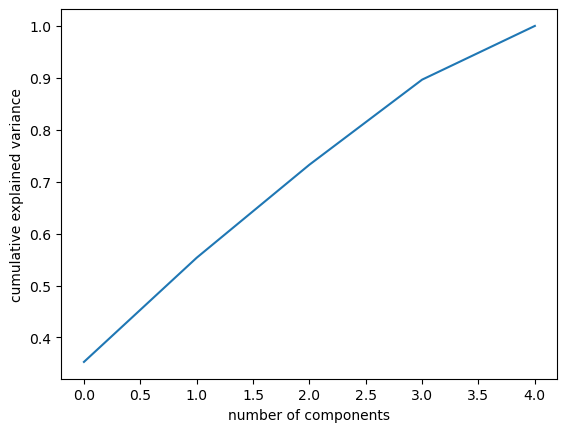

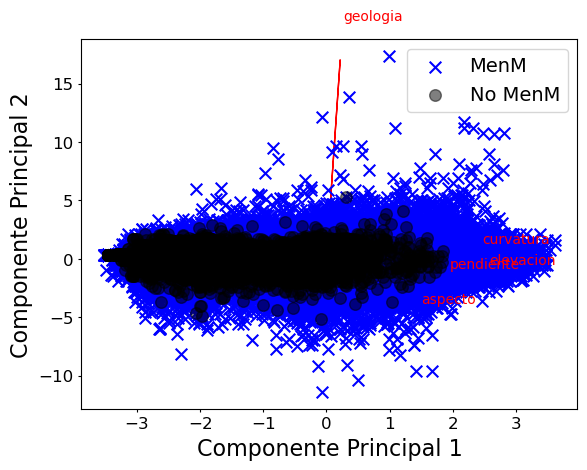

In [66]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Se importan los archivos

puntos=df['inventario']
df.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
df = pd.DataFrame(scale(df), columns=['pendiente', 'aspecto', 'elevacion', 'curvatura' , 'geologia']
)

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(df.columns)
pca = PCA(n_components=n)
pca = pca.fit(df)
pca_samples = pca.transform(df)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(df)[:,0] # Componente principal 1
ys = pca.transform(df)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()

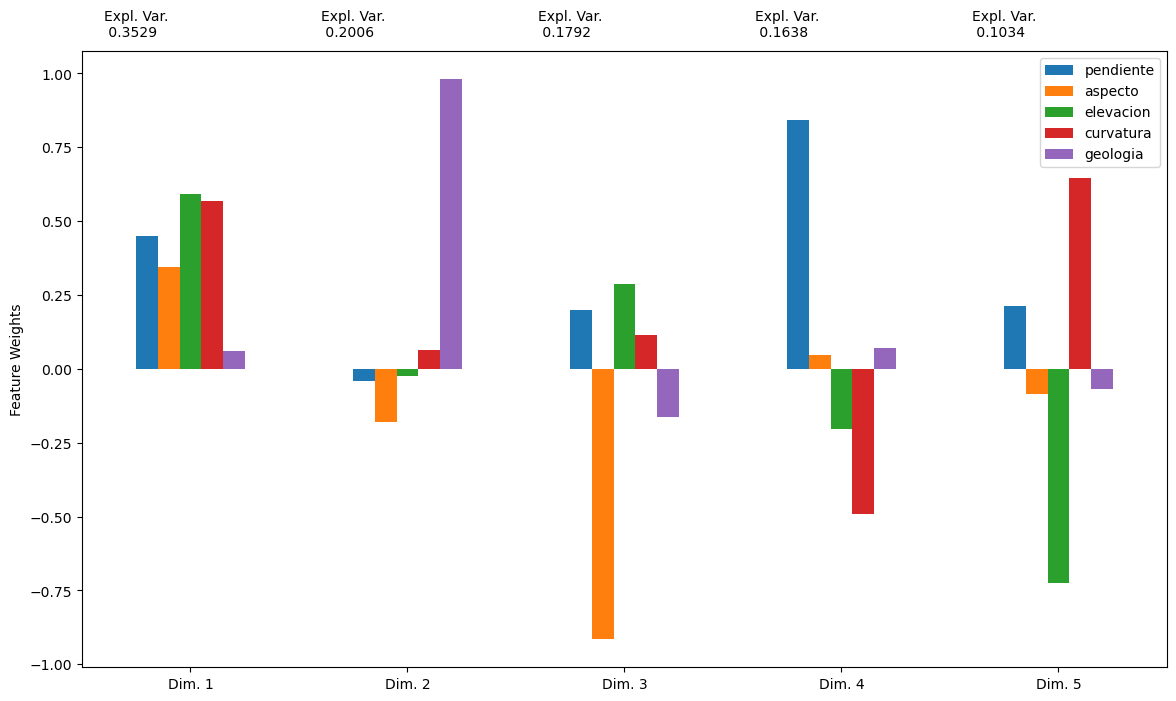

In [67]:
def pca_results(data, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(df, pca)

# METODOS HEURÍSTICOS

## AHP

In [106]:
import numpy as np

A=([[   1,    3,    3,    5,    1],
    [0.33,    1,    1,    3, 0.33],
    [0.33,    1,    1,    3, 0.33],
    [ 0.2, 0.33, 0.33,    1,  0.2],
    [   1,    3,    3,    5,    1]])

B=np.array(A) # para transformarla en una matriz

values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios

vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print('esto son los valores propios',values)

esto son los valores propios [ 5.04538348e+00+0.j        -2.26917383e-02+0.5370867j
 -2.26917383e-02-0.5370867j  7.45056235e-18+0.j
 -5.20283940e-17+0.j       ]


In [107]:
print('esto son los vectores propios', vectores)

esto son los vectores propios [[ 6.58557592e-01+0.00000000e+00j  6.50398926e-01+1.50540047e-16j
   6.50398926e-01-1.50540047e-16j -2.88963953e-01+0.00000000e+00j
   3.60675290e-01+0.00000000e+00j]
 [ 2.46484535e-01+0.00000000e+00j -1.64017826e-01+1.88729223e-01j
  -1.64017826e-01-1.88729223e-01j -6.45367983e-01+0.00000000e+00j
  -6.08205011e-01+0.00000000e+00j]
 [ 2.46484535e-01+0.00000000e+00j -1.64017826e-01+1.88729223e-01j
  -1.64017826e-01-1.88729223e-01j  6.45367983e-01+0.00000000e+00j
   6.08205011e-01+0.00000000e+00j]
 [ 1.05330640e-01+0.00000000e+00j -6.62899151e-02-1.56610945e-01j
  -6.62899151e-02+1.56610945e-01j -2.04515582e-16+0.00000000e+00j
  -2.42383665e-16+0.00000000e+00j]
 [ 6.58557592e-01+0.00000000e+00j  6.50398926e-01+0.00000000e+00j
   6.50398926e-01-0.00000000e+00j  2.88963953e-01+0.00000000e+00j
  -3.60675290e-01+0.00000000e+00j]]


In [108]:
print('esto son los vectores propios normalizados',vector_norm)

esto son los vectores propios normalizados [[ 3.34133273e-01+0.00000000e+00j  3.29993799e-01+7.63797113e-17j
   3.29993799e-01-7.63797113e-17j -1.46612039e-01+0.00000000e+00j
   1.82996319e-01+0.00000000e+00j]
 [ 1.25059198e-01+0.00000000e+00j -8.32179506e-02+9.57558062e-02j
  -8.32179506e-02-9.57558062e-02j -3.27441243e-01+0.00000000e+00j
  -3.08585815e-01+0.00000000e+00j]
 [ 1.25059198e-01+0.00000000e+00j -8.32179506e-02+9.57558062e-02j
  -8.32179506e-02-9.57558062e-02j  3.27441243e-01+0.00000000e+00j
   3.08585815e-01+0.00000000e+00j]
 [ 5.34417519e-02+0.00000000e+00j -3.36336056e-02-7.94599110e-02j
  -3.36336056e-02+7.94599110e-02j -1.03765353e-16+0.00000000e+00j
  -1.22978534e-16+0.00000000e+00j]
 [ 3.34133273e-01+0.00000000e+00j  3.29993799e-01+0.00000000e+00j
   3.29993799e-01-0.00000000e+00j  1.46612039e-01+0.00000000e+00j
  -1.82996319e-01+0.00000000e+00j]]


In [109]:
w=vector_norm[:,0]
print(w)

[0.33413327+0.j 0.1250592 +0.j 0.1250592 +0.j 0.05344175+0.j
 0.33413327+0.j]


In [110]:
CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.12

print(CR)

(0.0101302403330553+0j)


## Método Combinado

[0.1 0.2 0.3 1.  nan]


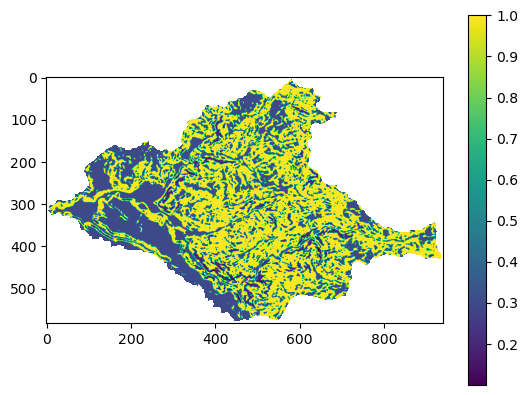

In [118]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<15 )),0.3,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=15, pendiente_re<35 )),1,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=35, pendiente_re<50 )),0.2,pendiente_re);
pendiente_re=np.where ( pendiente_re>=50,0.1,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

[0.2 0.3 0.5 0.6 1.  nan]


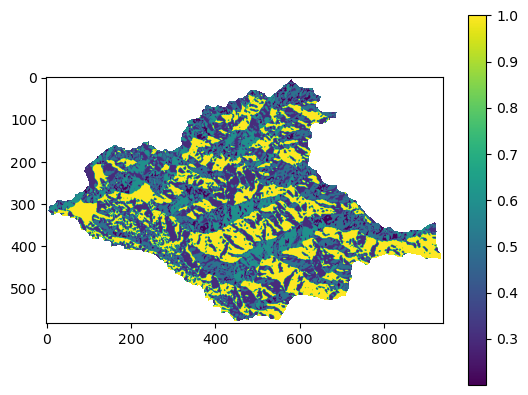

In [119]:
aspecto_re=np.where ( aspecto<20,1,aspecto);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=20, aspecto_re<120 )),0.3,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=120, aspecto_re<180 )),0.6,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=180, aspecto_re<200 )),0.2,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=200, aspecto_re<245 )),0.5,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=245, aspecto_re<300 )),0.3,aspecto_re);
aspecto_re=np.where ( aspecto_re>=300,1,aspecto_re);
print(np.unique(aspecto_re))
plt.imshow(aspecto_re);
plt.colorbar();

[0.1 0.2 0.4 0.5 0.7 1.  nan]


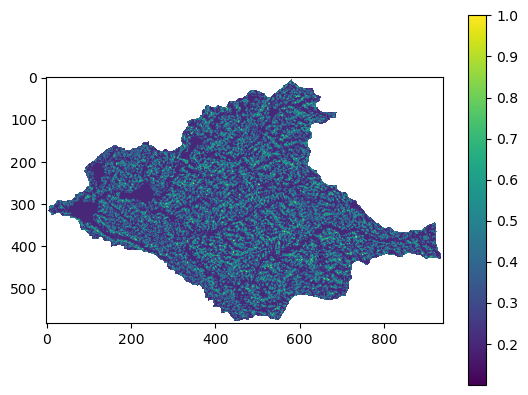

In [120]:
curvatura_re=np.where ( curvatura<-3.6,0.1,curvatura);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-3.6, curvatura_re<-3.1 )),0.4,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-3.1, curvatura_re<-2.8)),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-2.8, curvatura_re<-2.5 )),0.5,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-2.5, curvatura_re<-2.1 )),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-2.1, curvatura_re<-1.75 )),0.7,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-1.75, curvatura_re<-1.4 )),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-1.4, curvatura_re<-1.2 )),0.8,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-1.2, curvatura_re<-0.8 )),0.2,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-0.8, curvatura_re<-0.55)),1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-0.55, curvatura_re<-0.3)),0.2,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=-0.3, curvatura_re<0.2 )),1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=0.2, curvatura_re<0.5 )),0.2,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=0.5, curvatura_re<0.8 )),1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=0.8, curvatura_re<1.15 )),0.2,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=1.15, curvatura_re<1.4 )),1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=1.4, curvatura_re<1.7 )),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=1.7, curvatura_re<2.1 )),0.7,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=2.1, curvatura_re<2.4)),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=2.4, curvatura_re<2.75 )),0.5,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=2.75, curvatura_re<2.9)),0.1,curvatura_re);
curvatura_re=np.where ( (np.logical_and (curvatura_re>=2.9, curvatura_re<3.35 )),0.4,curvatura_re);
curvatura_re=np.where ( curvatura_re>=3.35,0.1,curvatura_re);
print(np.unique(curvatura_re))
plt.imshow(curvatura_re);
plt.colorbar();

[0.1 0.4 0.6 1.  nan]


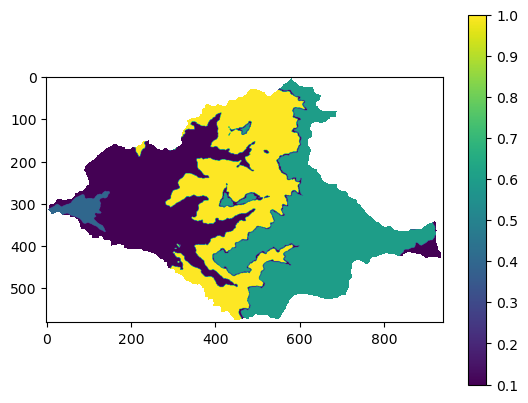

In [121]:
elevacion_re=np.where ( elevacion<120,0.1,elevacion);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=120, elevacion_re<210)),0.4,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=210, elevacion_re<395 )),0.1,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=395, elevacion_re<555 )),1,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=555, elevacion_re<570 )),0.1,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=570, elevacion_re<1100 )),0.6,elevacion_re);
elevacion_re=np.where ( elevacion_re>=1100,0.1,elevacion_re);
print(np.unique(elevacion_re))
plt.imshow(elevacion_re);
plt.colorbar();

[0.1 0.3 1.  nan]


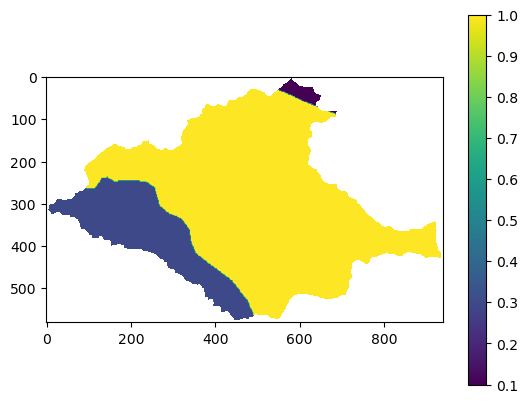

In [122]:
geologia_re=np.where ( geologia==1,0.3,geologia)
geologia_re=np.where ( geologia_re==2,1,geologia_re)
geologia_re=np.where ( geologia_re==3,0.1,geologia_re)

print(np.unique(geologia_re))
plt.imshow(geologia_re);
plt.colorbar();

In [123]:
print(w[0],w[1],w[2],w[3],w[4])

(0.33413327325209213+0j) (0.1250591982970175+0j) (0.12505919829701748+0j) (0.05344175191857191+0j) (0.3341332732520923+0j)


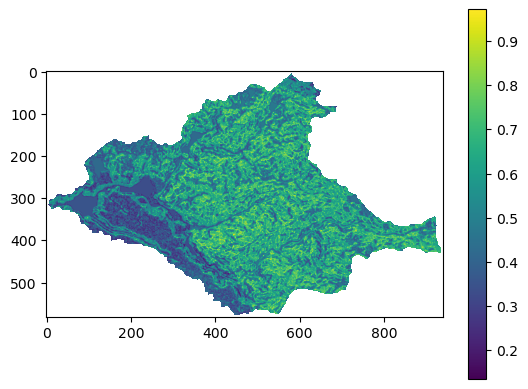

In [124]:
IS=0.3341*pendiente_re+0.12505*aspecto_re+0.12505*geologia_re+0.0534*elevacion_re+0.3341*curvatura_re
plt.imshow(IS);
plt.colorbar();

In [125]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS_H.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);

## EVALUACIÓN MODELO HEURISTICO

In [126]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'curvatura':curvatura_vector_MenM, 'elevacion': elevacion_vector_MenM}
df2 = pd.DataFrame(d)
X=df2.drop("inventario", axis=1)
y=df2['inventario']
X.head()

pendiente     aspecto  geologia  curvatura  elevacion
0   7.825526  194.036240       3.0      -0.64      763.0
1   8.447319  170.960526       3.0      -1.28      763.0
2   8.778080  212.660919       3.0       1.92      762.0
3   6.302977  185.194427       3.0       0.64      762.0
4   4.714065  194.036240       3.0      -0.00      762.0

In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [128]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (207386, 5)
Tamaño de labels de entrenamiento: (207386,)
Tamaño de variables de validación: (51847, 5)
Tamaño de labels de validación: (51847,)


In [129]:
result=model.fit(x_train,y_train)

In [130]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [131]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[200044,   1306],
       [   856,   5180]], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    201350
         1.0       0.80      0.86      0.83      6036

    accuracy                           0.99    207386
   macro avg       0.90      0.93      0.91    207386
weighted avg       0.99      0.99      0.99    207386



Text(0.7, 0.1, 'AUC=0.9961%')

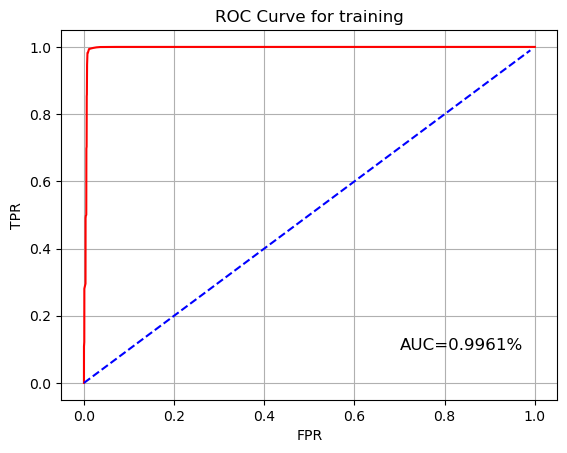

In [134]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [135]:
confusion_matrix(y_test, y_val_pred)

array([[49901,   515],
       [ 1117,   314]], dtype=int64)

In [136]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     50416
         1.0       0.38      0.22      0.28      1431

    accuracy                           0.97     51847
   macro avg       0.68      0.60      0.63     51847
weighted avg       0.96      0.97      0.96     51847



Text(0.7, 0.1, 'AUC=0.8293%')

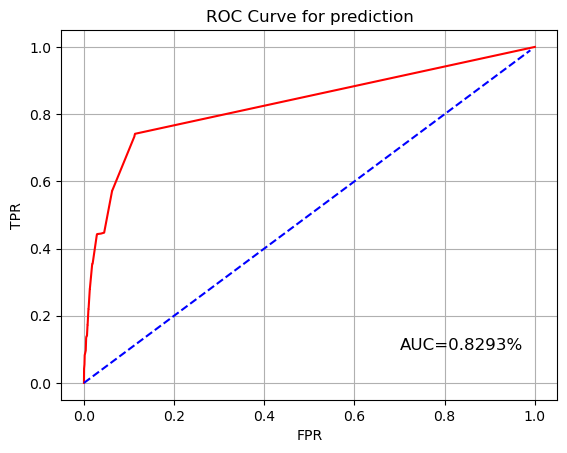

In [137]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [138]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
elevacion_vector2=np.nan_to_num(elevacion_vector)

f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2, 'elevacion':elevacion_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente  aspecto  geologia  curvatura  elevacion
0             0.0      0.0       0.0        0.0        0.0
1             0.0      0.0       0.0        0.0        0.0
2             0.0      0.0       0.0        0.0        0.0
3             0.0      0.0       0.0        0.0        0.0
4             0.0      0.0       0.0        0.0        0.0
...           ...      ...       ...        ...        ...
547657        0.0      0.0       0.0        0.0        0.0
547658        0.0      0.0       0.0        0.0        0.0
547659        0.0      0.0       0.0        0.0        0.0
547660        0.0      0.0       0.0        0.0        0.0
547661        0.0      0.0       0.0        0.0        0.0

[547662 rows x 5 columns]

In [139]:
y_pred=model.predict_proba(x_map)[:,1]

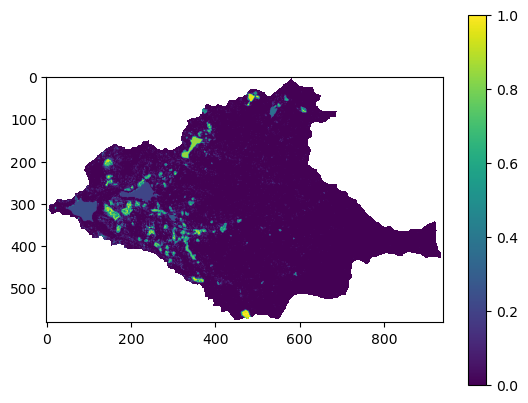

In [140]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

# MÉTODOS ESTADSTICOS BIVARIADOS

In [81]:
inventario_vector_MenM = inventario_vector_MenM.copy()
inventario_vector_MenM[inventario_vector_MenM == 0] =np.nan

## Frequency ratio model (Likelihood)

total: 259233 91180 146572 20884 597
total1: 7467 4666 2570 231 0
1.7765984589707324 0.6087321561704455 0.3840099079119934 0.0
[0.         0.3840099  0.60873216 1.7765985         nan]


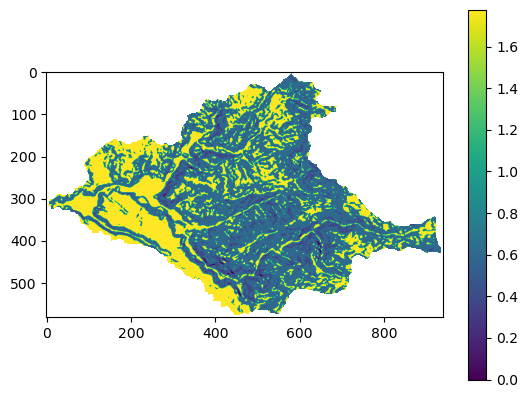

In [82]:
#Pendiente

pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=0
for row in pendiente_serie:
        if (row>=0) & (row < 15):
          ap+=1
        elif (15 <= row) & (row < 35):
          bp+=1
        elif (35 <= row) & (row < 50):
          cp+=1
        elif (row>=50):
          dp+=1

totalp=ap+bp+cp+dp
print("total:", totalp,ap,bp,cp,dp)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=0
for row in pendienteconMenM:
        if (row>=0) & (row < 15):
          ap1+=1
        elif (15 <= row) & (row < 35):
          bp1+=1
        elif (35 <= row) & (row < 50):
          cp1+=1
        elif (row>=50):
          dp1+=1

total1p=ap1+bp1+cp1+dp1
print("total1:", total1p,ap1,bp1,cp1,dp1)

w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
print(w_a,w_b,w_c,w_d)

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<15 )),w_a,pendiente )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=15, pendiente_c<35 )),w_b,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=35, pendiente_c<50 )),w_c,pendiente_c )
pendiente_c=np.where ( pendiente_c>=50,w_d,pendiente_c )

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

total: 259233 28259 35419 31459 17499 41590 47431 57576
total1: 7467 921 1235 720 551 1126 1578 1336
w: 1.1314802434935378 1.2105278811626743 0.7945691836540807 1.0931569044948695 0.9399258734102085 0.824176531701431 0.8055807928094676
[-1.          0.7945692   0.8055808   0.82417655  0.93992585  1.0931569
  1.1314802   1.2105279          nan]


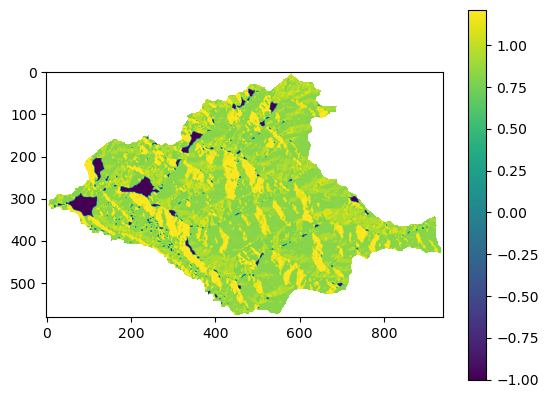

In [83]:
#Aspecto

aspecto_serie=pd.Series(aspecto_vector_MenM)

aa=ba=ca=da=ea=fa=ga=0

for row in aspecto_serie:
        if (row < 20):
          aa+=1
        elif (20 <= row) & (row < 120):
          ba+=1
        elif (120 <= row) & (row < 180):
          ca+=1
        elif (180 <= row) & (row < 200):
          da+=1
        elif (200 <= row) & (row < 245):
          ea+=1
        elif (245 <= row) & (row < 300):
          fa+=1
        elif (row>=300):
          ga+=1

totala=aa+ba+ca+da+ea+fa+ga
print("total:", totala,aa,ba,ca,da,ea,fa,ga)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=ea1=fa1=ga1=0
for row in aspectoconMenM:
        if (row < 20):
          aa1+=1
        elif (20 <= row) & (row < 120):
          ba1+=1
        elif (120 <= row) & (row < 180):
          ca1+=1
        elif (180 <= row) & (row < 200):
          da1+=1
        elif (200 <= row) & (row < 245):
          ea1+=1
        elif (245 <= row) & (row < 300):
          fa1+=1
        elif (row>=300):
          ga1+=1

total1a=aa1+ba1+ca1+da1+ea1+fa1+ga1
print("total1:", total1a,aa1,ba1,ca1,da1,ea1,fa1,ga1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
w_e=(ea1/total1a)/(ea/totala)
w_f=(ea1/total1a)/(fa/totala)
w_g=(ga1/total1a)/(ga/totala)
print("w:", w_a,w_b,w_c,w_d,w_e,w_f,w_g)

aspecto_c=np.where ( (np.logical_and (aspecto>=0, aspecto<20 )),w_a,aspecto )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=20, aspecto_c<120 )),w_b,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=120, aspecto_c<180 )),w_c,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=180, aspecto_c<200 )),w_d,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=200, aspecto_c<245 )),w_e,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=245, aspecto_c<300 )),w_f,aspecto_c )
aspecto_c=np.where ( aspecto_c>=300,w_g,aspecto_c )

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

total: 259233 2920 3152 0 7216 0 15419 0 29933 0 41251 0 58155 0 41536 0 31378 0 16225 0 7194 0 2808 2046
total1: 7467 62 45 0 161 0 385 0 926 0 1369 0 1909 0 1234 0 915 0 318 0 107 0 19 17
0.7371450821972845 0.49564466903104626 0.0 0.7745928537894897 0.0 0.8668593852642918 0.0 1.0740014692247535 0.0 1.152160816895935 0.0 1.1396277159178831 0.0 1.031417803048359 0.0 1.0123716383446717 0.0 0.6804348501666191 0.0 3714.735636801928 0.0 0.23490952784845914 0.2884612137000063
[0.         0.23490953 0.2884612  0.6804348  1.0123717         nan]


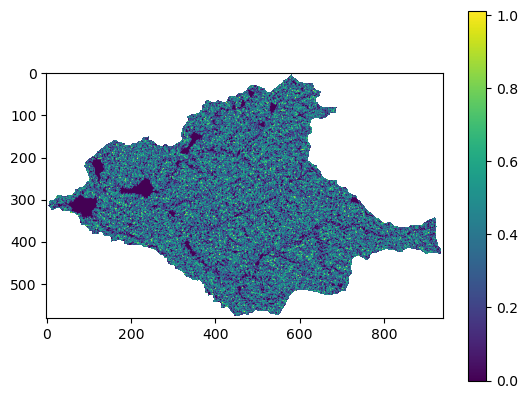

In [84]:
#Curvatura

curvatura_serie=pd.Series(curvatura_vector_MenM)

ac=bc=cc=dc=ec=fc=gc=hc=ic=jc=kc=lc=mc=nc=oc=pc=qc=rc=sc=tc=uc=vc=wc=0

for row in curvatura_serie:
        if (-16.64 < row) & (row < -3.6):
          ac+=1
        elif (-3.6 <= row) & (row < -3.1):
          bc+=1
        elif (-3.1 <= row) & (row < -2.8):
          cc+=1
        elif (-2.8 <= row) & (row < -2.5):
          dc+=1
        elif (-2.5 <= row) & (row < -2.1):
          ec+=1
        elif (-2.1 <= row) & (row < -1.75):
          fc+=1
        elif (-1.75 <= row) & (row < -1.4):
          gc+=1
        elif (-1.4 <= row) & (row < -1.2):
          hc+=1
        elif (-1.2 <= row) & (row < -0.8):
          ic+=1
        elif (-0.8 <= row) & (row < -0.55):
          jc+=1
        elif (-0.55 <= row) & (row < -0.3):
          kc+=1
        elif (-0.3 <= row) & (row < 0.2):
          lc+=1
        elif (0.2 <= row) & (row < 0.5):
          mc+=1
        elif (0.5 <= row) & (row < 0.8):
          nc+=1
        elif (0.8 <= row) & (row < 1.15):
          oc+=1
        elif (1.15 <= row) & (row < 1.4):
          pc+=1
        elif (1.4 <= row) & (row < 1.7):
          qc+=1
        elif (1.7 <= row) & (row < 2.1):
          rc+=1
        elif (2.1 <= row) & (row < 2.4):
          sc+=1
        elif (2.4 <= row) & (row < 2.75):
          tc+=1
        elif (2.75 <= row) & (row < 2.9):
          uc+=1
        elif (2.9 <= row) & (row < 3.35):
          vc+=1
        if (row>=3.35):
          wc+=1

totalc=ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc
print("total:", totalc,ac,bc,cc,dc,ec,fc,gc,hc,ic,jc,kc,lc,mc,nc,oc,pc,qc,rc,sc,tc,uc,vc,wc)

curvaturaconMenM=curvatura_vector_MenM*inventario_vector_MenM

ac1=bc1=cc1=dc1=ec1=fc1=gc1=hc1=ic1=jc1=kc1=lc1=mc1=nc1=oc1=pc1=qc1=rc1=sc1=tc1=uc1=vc1=wc1=0

for row in curvaturaconMenM:
        if (-16.64 < row) & (row < -3.6):
          ac1+=1
        elif (-3.6 <= row) & (row < -3.1):
          bc1+=1
        elif (-3.1 <= row) & (row < -2.8):
          cc1+=1
        elif (-2.8 <= row) & (row < -2.5):
          dc1+=1
        elif (-2.5 <= row) & (row < -2.1):
          ec1+=1
        elif (-2.1 <= row) & (row < -1.75):
          fc1+=1
        elif (-1.75 <= row) & (row < -1.4):
          gc1+=1
        elif (-1.4 <= row) & (row < -1.2):
          hc1+=1
        elif (-1.2 <= row) & (row < -0.8):
          ic1+=1
        elif (-0.8 <= row) & (row < -0.55):
          jc1+=1
        elif (-0.55 <= row) & (row < -0.3):
          kc1+=1
        elif (-0.3 <= row) & (row < 0.2):
          lc1+=1
        elif (0.2 <= row) & (row < 0.5):
          mc1+=1
        elif (0.5 <= row) & (row < 0.8):
          nc1+=1
        elif (0.8 <= row) & (row < 1.15):
          oc1+=1
        elif (1.15 <= row) & (row < 1.4):
          pc1+=1
        elif (1.4 <= row) & (row < 1.7):
          qc1+=1
        elif (1.7 <= row) & (row < 2.1):
          rc1+=1
        elif (2.1 <= row) & (row < 2.4):
          sc1+=1
        elif (2.4 <= row) & (row < 2.75):
          tc1+=1
        elif (2.75 <= row) & (row < 2.9):
          uc1+=1
        elif (2.9 <= row) & (row < 3.35):
          vc1+=1
        if (row>=3.35):
          wc1+=1

total1c=ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1
print("total1:", total1c,ac1,bc1,cc1,dc1,ec1,fc1,gc1,hc1,ic1,jc1,kc1,lc1,mc1,nc1,oc1,pc1,qc1,rc1,sc1,tc1,uc1,vc1,wc1)

cc=ec=gc=ic=kc=mc=oc=qc=sc=uc=tc=1

w_a=(ac1/total1c)/(ac/totalc)
w_b=(bc1/total1c)/(bc/totalc)
w_c=(cc1/total1c)/(cc/totalc)
w_d=(dc1/total1c)/(dc/totalc)
w_e=(ec1/total1c)/(ec/totalc)
w_f=(fc1/total1c)/(fc/totalc)
w_g=(gc1/total1c)/(gc/totalc)
w_h=(hc1/total1c)/(hc/totalc)
w_i=(ic1/total1c)/(ic/totalc)
w_j=(jc1/total1c)/(jc/totalc)
w_k=(kc1/total1c)/(kc/totalc)
w_l=(lc1/total1c)/(lc/totalc)
w_m=(mc1/total1c)/(mc/totalc)
w_n=(nc1/total1c)/(nc/totalc)
w_o=(oc1/total1c)/(oc/totalc)
w_p=(pc1/total1c)/(pc/totalc)
w_q=(qc1/total1c)/(qc/totalc)
w_r=(rc1/total1c)/(rc/totalc)
w_s=(sc1/total1c)/(sc/totalc)
w_t=(tc1/total1c)/(tc/totalc)
w_u=(uc1/total1c)/(uc/totalc)
w_v=(vc1/total1c)/(vc/totalc)
w_w=(wc1/total1c)/(wc/totalc)

print(w_a,w_b,w_c,w_d,w_e,w_f,w_g,w_h,w_i,w_j,w_k,w_l,w_m,w_n,w_o,w_p,w_q,w_r,w_s,w_t,w_u,w_v,w_w)

curvatura_c=np.where ( curvatura<-3.6,w_a,curvatura);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-3.6, curvatura_c<-3.1 )),w_b,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-3.1, curvatura_c<-2.8)),w_c,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.8, curvatura_c<-2.5 )),w_d,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.5, curvatura_c<-2.1 )),w_e,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.1, curvatura_c<-1.75 )),w_f,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-1.75, curvatura_c<-1.4 )),w_g,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-1.4, curvatura_c<-1.2 )),w_h,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-1.2, curvatura_c<-0.8 )),w_i,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-0.8, curvatura_c<-0.55)),w_j,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-0.55, curvatura_c<-0.3)),w_k,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-0.3, curvatura_c<0.2 )),w_l,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=0.2, curvatura_c<0.5 )),w_m,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=0.5, curvatura_c<0.8 )),w_n,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=0.8, curvatura_c<1.15 )),w_o,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=1.15, curvatura_c<1.4 )),w_p,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=1.4, curvatura_c<1.7 )),w_q,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=1.7, curvatura_c<2.1 )),w_r,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=2.1, curvatura_c<2.4)),w_s,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=2.4, curvatura_c<2.75 )),w_t,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=2.75, curvatura_c<2.9)),w_u,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=2.9, curvatura_c<3.35 )),w_v,curvatura_c);
curvatura_c=np.where ( curvatura_c>=3.35,w_w,curvatura_c);


plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));

total 259233 51722 204053 3458
total1 7467 4340 3127 0
w: 2.9131212018314248 0.5320213140648511 0.0
[0.         0.53202131 2.9131212         nan]


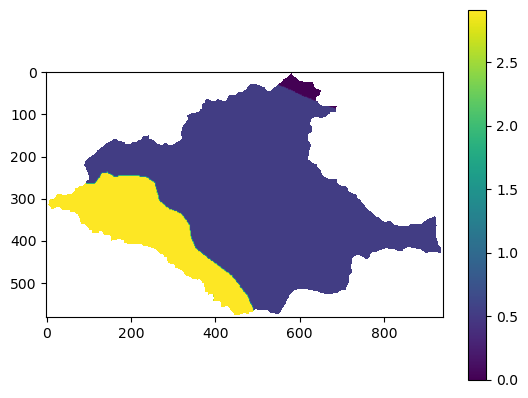

In [85]:
ag=(geologia == 1).sum()
bg=(geologia == 2).sum()
cg=(geologia == 3).sum()

totalg=ag+bg+cg
print("total", totalg,ag,bg,cg)

geologiaconMenM=geologia*inventario
ag1=(geologiaconMenM == 1).sum()
bg1=(geologiaconMenM == 2).sum()
cg1=(geologiaconMenM == 3).sum()


total1g=ag1+bg1+cg1
print("total1", total1g,ag1,bg1,cg1)

w_a=(ag1/total1g)/(ag/totalg)
w_b=(bg1/total1g)/(bg/totalg)
w_c=(cg1/total1g)/(cg/totalg)

print("w:", w_a,w_b,w_c)

geologia_c=np.where ( geologia==1,w_a,geologia )
geologia_c=np.where ( geologia_c==2,w_b,geologia_c )
geologia_c=np.where ( geologia_c==3,w_c,geologia_c )


plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

total: 259233 0 5279 75667 80270 4777 90309 2931
total1: 7467 0 71 5910 973 39 474 0
0.0 0.4669289712773711 2.711596718664799 0.4208271120724886 0.2834350144193169 0.18221807017548308 0.0
[0.         0.18221807 0.28343501 0.42082711 0.46692897 2.71159672
        nan]


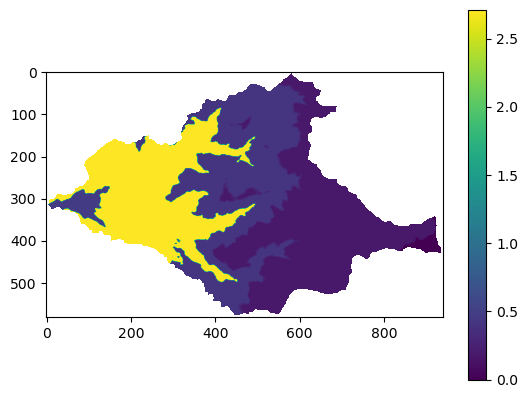

In [86]:
#Elevación

elevacion_serie=pd.Series(elevacion_vector_MenM)
ae=be=ce=de=ee=fe=ge=0
for row in elevacion_serie:
        if (0 <= row) & (row < 120):
          ae+=1
        elif (120 <= row) & (row < 210):
          be+=1
        elif (210 <= row) & (row < 395):
          ce+=1
        elif (395 <= row) & (row < 555):
          de+=1
        elif (555 <= row) & (row < 570):
          ee+=1
        elif (570 <= row) & (row < 1100):
          fe+=1
        if (row>=1100):
          ge+=1

totale=ae+be+ce+de+ee+fe+ge
print("total:", totale,ae,be,ce,de,ee,fe,ge)

elevacionconMenM=elevacion_vector_MenM*inventario_vector_MenM
ae1=be1=ce1=de1=ee1=fe1=ge1=0
for row in elevacionconMenM:
        if (0 <= row) & (row < 120):
          ae1+=1
        elif (120 <= row) & (row < 210):
          be1+=1
        elif (210 <= row) & (row < 395):
          ce1+=1
        elif (395 <= row) & (row < 555):
          de1+=1
        elif (555 <= row) & (row < 570):
          ee1+=1
        elif (570 <= row) & (row < 1100):
          fe1+=1
        if (row>=1100):
          ge1+=1
        
total1e=ae1+be1+ce1+de1+ee1+fe1+ge1
print("total1:", total1e,ae1,be1,ce1,de1,ee1,fe1,ge1)

ae=1

w_a=(ae1/total1e)/(ae/totale)
w_b=(be1/total1e)/(be/totale)
w_c=(ce1/total1e)/(ce/totale)
w_d=(de1/total1e)/(de/totale)
w_e=(ee1/total1e)/(ee/totale)
w_f=(fe1/total1e)/(fe/totale)
w_g=(ge1/total1e)/(ge/totale)
print(w_a,w_b,w_c,w_d,w_e,w_f,w_g)

elevacion_c=np.where ( (np.logical_and (elevacion>=0, elevacion<120 )),w_a,elevacion)
elevacion_c=np.where ( (np.logical_and (elevacion_c>=120, elevacion_c<210 )),w_b,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=210, elevacion_c<395 )),w_c,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=395, elevacion_c<555 )),w_d,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=555, elevacion_c<570 )),w_e,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=570, elevacion_c<1100 )),w_f,elevacion_c )
elevacion_c=np.where ( elevacion_c>=1100,w_g,elevacion_c )

plt.imshow(elevacion_c)
plt.colorbar()
print(np.unique(elevacion_c));

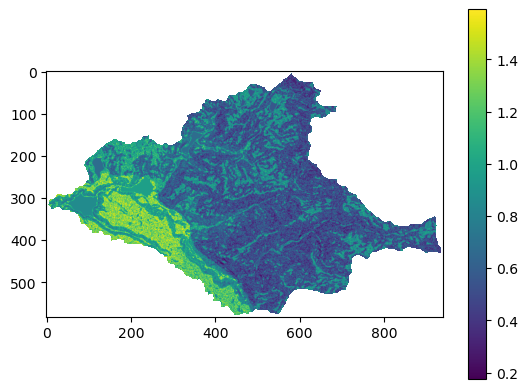

In [87]:
IS=0.3341*pendiente_c+0.12505*aspecto_c+0.12505*geologia_c+0.0534*elevacion_c+0.3341*curvatura_c
#IS=pendiente_c+aspecto_c+geologia_c+elevacion_c+curvatura_c
plt.imshow(IS);
plt.colorbar();

## Statistical index model

0.028804203168578076
0.5747005579494694 -0.4963769172606245 -0.957086924873123 -2.8446831542570754
[-2.8446832  -0.9570869  -0.49637693  0.57470053         nan]


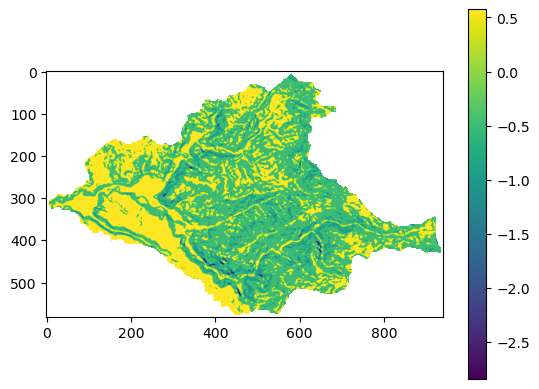

In [88]:
#Pendiente
dt=total1p/totalp
print(dt)

dp1=1 #0 movimientos en masa en esa clase

w_a=np.log((ap1/ap)/dt)
w_b=np.log((bp1/bp)/dt)
w_c=np.log((cp1/cp)/dt)
w_d=np.log((dp1/dp)/dt)
print(w_a,w_b,w_c,w_d)

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<15 )),w_a,pendiente )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=15, pendiente_c<35 )),w_b,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=35, pendiente_c<50 )),w_c,pendiente_c )
pendiente_c=np.where ( pendiente_c>=50,w_d,pendiente_c )

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

0.028804203168578076
w: 0.12352672548257938 0.19105652989625624 -0.22995521856602044 0.08906975286669373 -0.061954264901795154 0.14411615818967863 -0.21619177995552266
[-1.         -0.22995521 -0.21619178 -0.06195426  0.08906975  0.12352672
  0.14411616  0.19105653         nan]


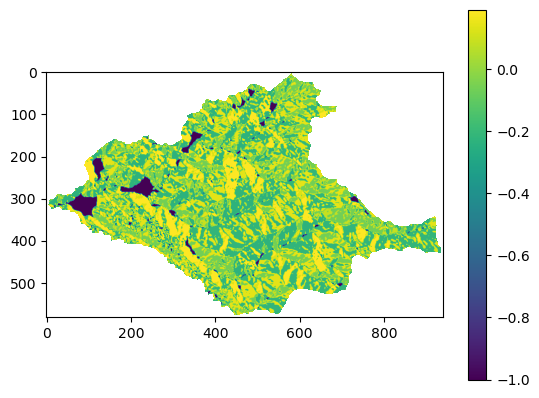

In [89]:
#Aspecto
dt=total1a/totala
print(dt)

w_a=np.log((aa1/aa)/dt)
w_b=np.log((ba1/ba)/dt)
w_c=np.log((ca1/ca)/dt)
w_d=np.log((da1/da)/dt)
w_e=np.log((ea1/ea)/dt)
w_f=np.log((fa1/fa)/dt)
w_g=np.log((ga1/ga)/dt)
print("w:", w_a,w_b,w_c,w_d,w_e,w_f,w_g)

aspecto_c=np.where ( (np.logical_and (aspecto>=0, aspecto<20 )),w_a,aspecto )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=20, aspecto_c<120 )),w_b,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=120, aspecto_c<180 )),w_c,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=180, aspecto_c<200 )),w_d,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=200, aspecto_c<245 )),w_e,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=245, aspecto_c<300 )),w_f,aspecto_c )
aspecto_c=np.where ( aspecto_c>=300,w_g,aspecto_c )

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

0.028804203168578076
w: 1.0692250843315918 -0.6310717264113598 -4.601211707107709
[-4.60121171 -0.63107173  1.06922508         nan]


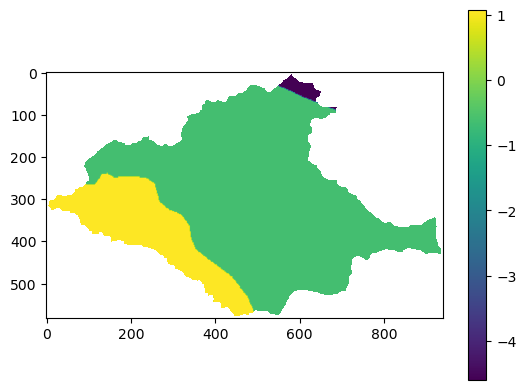

In [90]:
#Geología
dt=total1g/totalg
print(dt)

cg1=1   #clases que obtuvieron 0 celdas con movimientos en masa

w_a=np.log((ag1/ag)/dt)
w_b=np.log((bg1/bg)/dt)
w_c=np.log((cg1/cg)/dt)

print("w:", w_a,w_b,w_c)

geologia_c=np.where ( geologia==1,w_a,geologia )
geologia_c=np.where ( geologia_c==2,w_b,geologia_c )
geologia_c=np.where ( geologia_c==3,w_c,geologia_c )

plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

0.028804203168578076
-0.30497055108170934 -0.7018960020719235 3.5472339591355264 -0.25541773762247 3.5472339591355264 -0.14287850074804193 3.5472339591355264 0.07139136407898981 3.5472339591355264 0.14163915053074896 3.5472339591355264 0.13070164408813492 3.5472339591355264 0.030934363537097737 3.5472339591355264 0.012295735018147055 3.5472339591355264 -0.3850231996565873 3.5472339591355264 3.5472339591355264 3.5472339591355264 -1.4485548268437347 -1.243194643319829
[-1.2431947   0.03093436  0.13070165         nan]


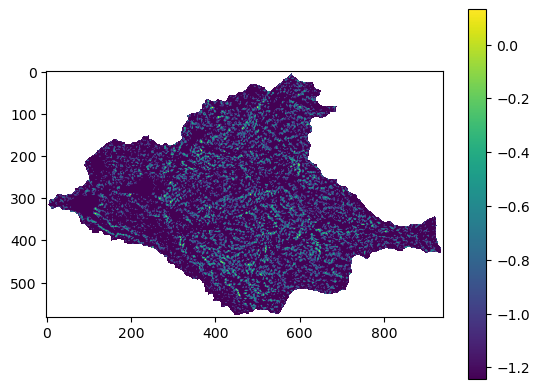

In [91]:
#Curvatura
dt=total1c/totalc
print(dt)

cc1=ec1=gc1=ic1=kc1=mc1=oc1=qc1=sc1=uc1=tc1=1   #clases que obtuvieron 0 celdas con movimientos en masa

w_a=np.log((ac1/ac)/dt)
w_b=np.log((bc1/bc)/dt)
w_c=np.log((cc1/cc)/dt)
w_d=np.log((dc1/dc)/dt)
w_e=np.log((ec1/ec)/dt)
w_f=np.log((fc1/fc)/dt)
w_g=np.log((gc1/gc)/dt)
w_h=np.log((hc1/hc)/dt)
w_i=np.log((ic1/ic)/dt)
w_j=np.log((jc1/jc)/dt)
w_k=np.log((kc1/kc)/dt)
w_l=np.log((lc1/lc)/dt)
w_m=np.log((mc1/mc)/dt)
w_n=np.log((nc1/nc)/dt)
w_o=np.log((oc1/oc)/dt)
w_p=np.log((pc1/pc)/dt)
w_q=np.log((qc1/qc)/dt)
w_r=np.log((rc1/rc)/dt)
w_s=np.log((sc1/sc)/dt)
w_t=np.log((tc1/tc)/dt)
w_u=np.log((uc1/uc)/dt)
w_v=np.log((vc1/vc)/dt)
w_w=np.log((wc1/wc)/dt)

print(w_a,w_b,w_c,w_d,w_e,w_f,w_g,w_h,w_i,w_j,w_k,w_l,w_m,w_n,w_o,w_p,w_q,w_r,w_s,w_t,w_u,w_v,w_w)

curvatura_c=np.where ( curvatura<-3.6,w_a,curvatura);
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-3.6, curvatura_c<-3.1 )),w_b,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-3.1, curvatura_re<-2.8)),w_c,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-2.8, curvatura_re<-2.5 )),w_d,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-2.5, curvatura_re<-2.1 )),w_e,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-2.1, curvatura_re<-1.75 )),w_f,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-1.75, curvatura_re<-1.4 )),w_g,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-1.4, curvatura_re<-1.2 )),w_h,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-1.2, curvatura_re<-0.8 )),w_i,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-0.8, curvatura_re<-0.55)),w_j,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-0.55, curvatura_re<-0.3)),w_k,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=-0.3, curvatura_re<0.2 )),w_l,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=0.2, curvatura_re<0.5 )),w_m,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=0.5, curvatura_re<0.8 )),w_n,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=0.8, curvatura_re<1.15 )),w_o,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=1.15, curvatura_re<1.4 )),w_p,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=1.4, curvatura_re<1.7 )),w_q,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=1.7, curvatura_re<2.1 )),w_r,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=2.1, curvatura_re<2.4)),w_s,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=2.4, curvatura_re<2.75 )),w_t,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=2.75, curvatura_re<2.9)),w_t,curvatura_c);
curvatura_c=np.where ( (np.logical_and (curvatura_re>=2.9, curvatura_re<3.35 )),w_u,curvatura_c);
curvatura_c=np.where ( curvatura_c>=3.35,w_w,curvatura_c);

plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));



0.028804203168578076
w: 3.5472339591355264 -0.7615781286467742 0.9975376564635999 -0.865533189804091 -1.2607724081247889 -1.7025511213820574 -4.4358649815753655
[-4.43586498 -1.70255112 -1.26077241 -0.86553319 -0.76157813  0.99753766
         nan]


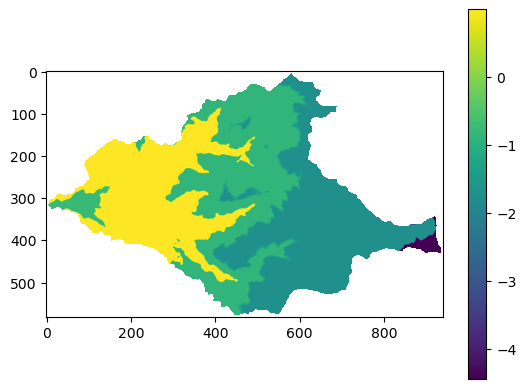

In [92]:
#Elevación
dt=total1e/totale
print(dt)

ae1=ge1=1   #clases que obtuvieron 0 celdas con movimientos en masa

w_a=np.log((ae1/ae)/dt)
w_b=np.log((be1/be)/dt)
w_c=np.log((ce1/ce)/dt)
w_d=np.log((de1/de)/dt)
w_e=np.log((ee1/ee)/dt)
w_f=np.log((fe1/fe)/dt)
w_g=np.log((ge1/ge)/dt)

print("w:", w_a,w_b,w_c,w_d,w_e,w_f,w_g)

elevacion_c=np.where ( (np.logical_and (elevacion>=0, elevacion<120 )),w_a,elevacion)
elevacion_c=np.where ( (np.logical_and (elevacion_c>=120, elevacion_c<210 )),w_b,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=210, elevacion_c<395 )),w_c,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=395, elevacion_c<555 )),w_d,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=555, elevacion_c<570 )),w_e,elevacion_c )
elevacion_c=np.where ( (np.logical_and (elevacion_c>=570, elevacion_c<1100 )),w_f,elevacion_c )
elevacion_c=np.where ( elevacion_c>=1100,w_g,elevacion_c )

plt.imshow(elevacion_c)
plt.colorbar()
print(np.unique(elevacion_c));


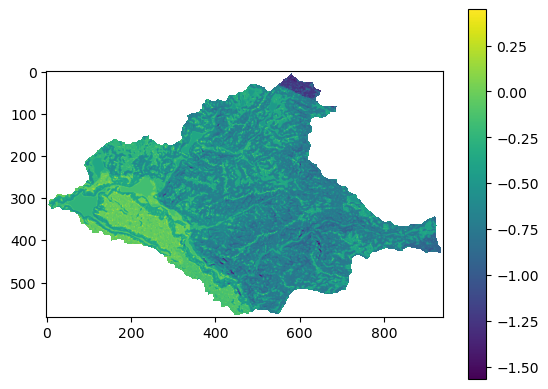

In [93]:
IS=0.3341*pendiente_c+0.12505*aspecto_c+0.12505*geologia_c+0.0534*elevacion_c+0.3341*curvatura_c
plt.imshow(IS);
plt.colorbar();

## Peso de la evidencia (WoE)

0.5979987237363517 -0.5594862331830524 -0.507918488771633 0.4266912020516134 -0.9751953550761778 0.0541689267171332 -2.1774153962618708 0.002098240379585313
[-2.1795137 -1.0293642 -0.9346097  1.157485         nan]


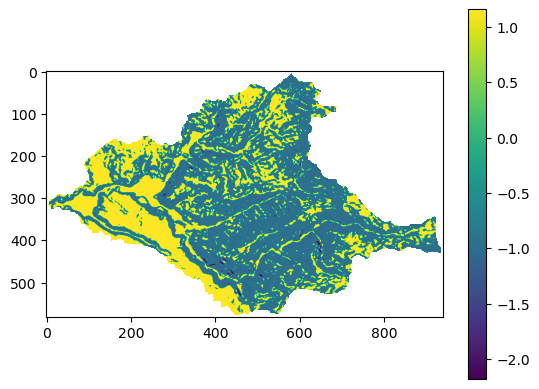

In [94]:
#Pendiente

#Clase a
x1=ap1
x2=total1p-ap1
x3=ap-ap1
x4=(bp+cp+dp)-(bp1+cp1+dp1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<15 )),c,pendiente );

#Clase b
x1=bp1
x2=total1p-bp1
x3=bp-bp1
x4=(ap+cp+dp)-(ap1+cp1+dp1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=15, pendiente_c<35 )),cont,pendiente_c )

#Clase c
x1=cp1
x2=total1p-cp1
x3=cp-cp1
x4=(ap+bp+dp)-(ap1+bp1+dp1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=35, pendiente_c<50 )),cont,pendiente_c )

dp1=dp1+1 #0 movimientos en masa en esa clase

#Clase d
x1=dp1
x2=total1p-dp1
x3=dp-dp1
x4=(ap+bp+cp)-(ap1+bp1+cp1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where (pendiente_c>=50,cont,pendiente_c )

print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d)

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

0.12743385418247544 -0.016693994329361136 0.1973200443779837 -0.03487170976380157 -0.23602950100921852 0.028819868283985327 0.09183647004623141 -0.006966405542901947 -0.06373438757034379 0.011754867565111678 0.14872436774902026 -0.036360772883820336 -0.22194139974818863 0.05567127851022714
[-1.         -0.2776127  -0.26484936 -0.07548925  0.09880287  0.14412785
  0.18508515  0.23219176         nan]


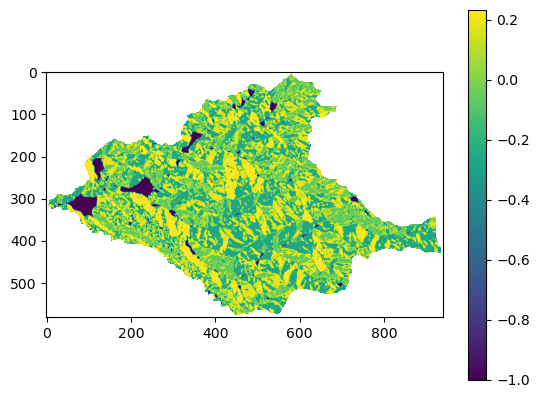

In [95]:
#Aspecto

#Clase a
x1=aa1
x2=total1a-aa1
x3=aa-aa1
x4=(ba+ca+da+ea+fa+ga)-(ba1+ca1+da1+ea1+fa1+ga1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto>=0, aspecto<20 )),cont,aspecto )

#Clase b
x1=ba1
x2=total1a-ba1
x3=ba-ba1
x4=(aa+ca+da+ea+fa+ga)-(aa1+ca1+da1+ea1+fa1+ga1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=20, aspecto_c<120 )),cont,aspecto_c )

#Clase c
x1=ca1
x2=total1a-ca1
x3=ca-ca1
x4=(aa+ba+da+ea+fa+ga)-(aa1+ba1+da1+ea1+fa1+ga1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=120, aspecto_c<180 )),cont,aspecto_c )

#Clase d
x1=da1
x2=total1a-da1
x3=da-da1
x4=(aa+ba+ca+ea+fa+ga)-(aa1+ba1+ca1+ea1+fa1+ga1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=180, aspecto_c<200 )),cont,aspecto_c )

#Clase e
x1=ea1
x2=total1a-ea1
x3=ea-ea1
x4=(aa+ba+ca+da+fa+ga)-(aa1+ba1+ca1+da1+fa1+ga1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=200, aspecto_c<245 )),cont,aspecto_c )

#Clase f
x1=fa1
x2=total1a-fa1
x3=fa-fa1
x4=(aa+ba+ca+da+ea+ga)-(aa1+ba1+ca1+da1+ea1+ga1)

wp_f=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_f=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=245, aspecto_c<300 )),cont,aspecto_c )

#Clase g
x1=ga1
x2=total1a-ga1
x3=ga-ga1
x4=(aa+ba+ca+da+ea+fa)-(aa1+ba1+ca1+da1+ea1+fa1)

wp_g=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_g=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where (aspecto_c>=300,cont,aspecto_c )

print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e, wp_f, wn_f, wp_g, wn_g)

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

1.127634739058493 -0.6619188054509262 -0.644859801902475 1.057213372225721 -4.6301536392319464 0.01369227009716267
[-4.64384591 -1.70207317  1.78955354         nan]


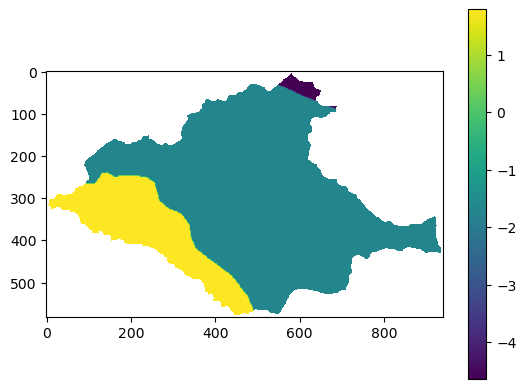

In [96]:
#Geología

cg1=1   #clases que obtuvieron 0 celdas con movimientos en masa

#Clase a
x1=ag1
x2=total1g-ag1
x3=ag-ag1
x4=(bg+cg)-(bg1+cg1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where(geologia==1,cont,geologia)

#Clase b
x1=bg1
x2=total1g-bg1
x3=bg-bg1
x4=(ag+cg)-(ag1+cg1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==2,cont,geologia_c)

#Clase c
x1=cg1
x2=total1g-cg1
x3=cg-cg1
x4=(ag+bg)-(ag1+bg1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==3,cont,geologia_c)


print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c)

plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

-0.34124418225169245 0.0034109687108645945 -0.34465515096255706
-0.17532745625660126 0.010472607737669188 -0.18580006399427046
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
0.04508056668755093 -0.006220886950650697 0.05130145363820156
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
0.11765424321184058 -0.024613315143341488 0.14226755835518198
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
0.10634340849173568 -0.03406375800894116 0.14040716650067683
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
0.0033586211634421682 -0.0006635991715279551 0.0040222203349700395
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
-0.015845254953516935 0.0022329372536670842 -0.01807819220718405
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
-0.4229643689251549 0.02369732193183497 -0.44666169085698976
3.4894987911930286 -0.00012984474911072847 3.4896286359421396
3.4894987911930286 -0.00012984474911072847 3.4896286359421396

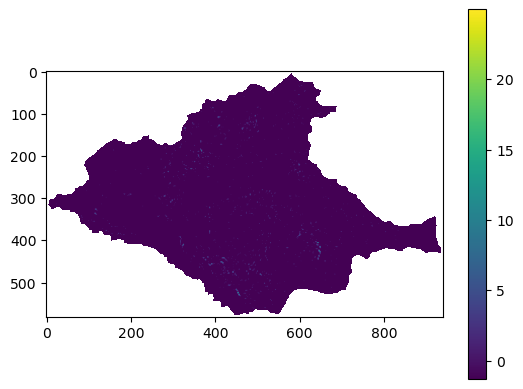

In [97]:
#Curvatura

cc1=ec1=gc1=ic1=kc1=mc1=oc1=qc1=sc1=uc1=tc1=1
cc=ec=gc=ic=kc=mc=oc=qc=sc=uc=tc=2


#Clase a
x1=ac1
x2=total1c-ac1
x3=ac-ac1
x4=(bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

curvatura_c=np.where (curvatura<-3.6,c,curvatura );

#Clase b
x1=bc1
x2=total1c-bc1
x3=bc-bc1
x4=(ac+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=--3.6, curvatura_c<-3.1)),cont,curvatura_c )

#Clase c
x1=cc1
x2=total1c-cc1
x3=cc-cc1
x4=(ac+bc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_c=np.log((x1/(x1+x2)/(x3/(x3+x4))))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-3.1, curvatura_c<-2.8 )),cont,curvatura_c )

#Clase d
x1=dc1
x2=total1c-dc1
x3=dc-dc1
x4=(ac+bc+cc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.8, curvatura_c<-2.5 )),cont,curvatura_c )

#Clase e
x1=ec1
x2=total1c-ec1
x3=ec-ec1
x4=(ac+bc+cc+dc+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.5, curvatura_c<-2.1 )),cont,curvatura_c )

#Clase f
x1=fc1
x2=total1c-fc1
x3=fc-fc1
x4=(ac+bc+cc+dc+ec+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_f=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_f=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_f, wn_f, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-2.1, curvatura<-1.75 )),c,curvatura );

#Clase g
x1=gc1
x2=total1c-gc1
x3=gc-gc1
x4=(ac+bc+cc+dc+ec+fc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_g=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_g=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_g, wn_g, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-1.75, curvatura<-1.4 )),c,curvatura );

#Clase h
x1=hc1
x2=total1c-hc1
x3=hc-hc1
x4=(ac+bc+cc+dc+ec+fc+gc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_h=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_h=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_h, wn_h, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-1.4, curvatura<-1.2 )),c,curvatura );

#Clase i
x1=ic1
x2=total1c-ic1
x3=ic-ic1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_i=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_i=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_i, wn_i, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-1.2, curvatura<-0.8 )),c,curvatura );

#Clase j
x1=jc1
x2=total1c-jc1
x3=jc-jc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_j=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_j=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_j, wn_j, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-0.8, curvatura<-0.55 )),c,curvatura );

#Clase k
x1=kc1
x2=total1c-kc1
x3=kc-kc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_k=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_k=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_k, wn_k, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-0.55, curvatura<-0.3 )),c,curvatura );

#Clase l
x1=lc1
x2=total1c-lc1
x3=lc-lc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_l=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_l=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_l, wn_l, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=-0.3, curvatura<0.2 )),c,curvatura );

#Clase m
x1=mc1
x2=total1c-mc1
x3=mc-mc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+nc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_m=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_m=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_m, wn_m, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=0.2, curvatura<0.5 )),c,curvatura );

#Clase n
x1=nc1
x2=total1c-nc1
x3=nc-nc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+oc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_n=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_n=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_n, wn_n, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=0.5, curvatura<0.8 )),c,curvatura );

#Clase o
x1=oc1
x2=total1c-oc1
x3=oc-oc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+pc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_o=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_o=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_o, wn_o, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=0.8, curvatura<1.15 )),c,curvatura );

#Clase p
x1=pc1
x2=total1c-pc1
x3=pc-pc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+qc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+qc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_p=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_p=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_p, wn_p, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=1.15, curvatura<1.4 )),c,curvatura );

#Clase q
x1=qc1
x2=total1c-qc1
x3=qc-qc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+rc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+rc1+sc1+tc1+uc1+vc1+wc1)

wp_q=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_q=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_q, wn_q, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=1.4, curvatura<1.7 )),c,curvatura );

#Clase r
x1=rc1
x2=total1c-rc1
x3=rc-rc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+sc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+sc1+tc1+uc1+vc1+wc1)

wp_r=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_r=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_r, wn_r, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=1.7, curvatura<2.1 )),c,curvatura );

#Clase s
x1=sc1
x2=total1c-sc1
x3=sc-sc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+tc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+tc1+uc1+vc1+wc1)

wp_s=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_s=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_s, wn_s, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=2.1, curvatura<2.4 )),c,curvatura );

#Clase t
x1=tc1
x2=total1c-tc1
x3=tc-tc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+uc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+uc1+vc1+wc1)

wp_t=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_t=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_t, wn_t, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=2.4, curvatura<2.75 )),c,curvatura );

#Clase u
x1=uc1
x2=total1c-uc1
x3=uc-uc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+vc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+vc1+wc1)

wp_u=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_u=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_u, wn_u, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=2.75, curvatura<2.9 )),c,curvatura );

#Clase v
x1=vc1
x2=total1c-vc1
x3=vc-vc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+wc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+wc1)

wp_v=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_v=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_v, wn_v, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=2.9, curvatura<3.35 )),c,curvatura );

#Clase w
x1=wc1
x2=total1c-wc1
x3=wc-wc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc+mc+nc+oc+pc+qc+rc+sc+tc+uc+vc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1+mc1+nc1+oc1+pc1+qc1+rc1+sc1+tc1+uc1+vc1)

wp_w=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_w=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_w, wn_w, c)

curvatura_c=np.where (curvatura<3.35,c,curvatura );


print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e, wp_f, wn_f, wp_g, wn_g, wp_h, wn_h, wp_i, wn_i, wp_j, wn_j, wp_k, wn_k, wp_l, wn_l, wp_m, wn_m, wp_n, wn_n, wp_o, wn_o, wp_p, wn_p, wp_q, wn_q, wp_r, wn_r, wp_s, wn_s, wp_t, wn_t, wp_u, wn_u, wp_v, wn_v, wp_w, wn_w)

plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));

3.518006772639767 -0.00012995961108411408 3.518136732250851
3.518006772639767 -0.00012995961108411408 -0.777264534207323 0.011348826241572836 1.0496348299689293 -1.2432884709119798 -0.8825647210601187 0.2386679361437372 -1.2818019659493176 0.013761725603158295 -1.726515839031829 0.37574610278725024 -3.7717376624373125 0.011438194574705495
[3.51813673        nan]


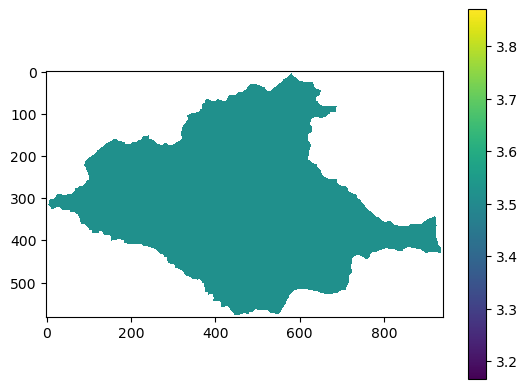

In [98]:
#Elevacion

ae1=ge1=1
ae=2 #clases que obtuvieron 0 celdas con movimientos en masa

#Clase a
x1=ae1
x2=total1e-ae1
x3=ae-ae1
x4=(be+ce+de+ee+fe+ge)-(be1+ce1+de1+ee1+fe1+ge1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

elevacion_c=np.where ( (np.logical_and (elevacion>=0, curvatura<120 )),c,elevacion );

#Clase b
x1=be1
x2=total1e-be1
x3=be-be1
x4=(ae+ce+de+ee+fe+ge)-(ae1+ce1+de1+ee1+fe1+ge1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where ( (np.logical_and (elevacion_c>=120, elevacion_c<210)),cont,elevacion_c )

#Clase c
x1=ce1
x2=total1e-ce1
x3=ce-ce1
x4=(ae+be+de+ee+fe+ge)-(ae1+be1+de1+ee1+fe1+ge1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where ( (np.logical_and (elevacion_c>=210, elevacion_c<395 )),cont,elevacion_c )

#Clase d
x1=de1
x2=total1e-de1
x3=de-de1
x4=(ae+be+ce+ee+fe+ge)-(ae1+be1+ce1+ee1+fe1+ge1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where ( (np.logical_and (elevacion_c>=395, elevacion_c<555 )),cont,elevacion_c )

#Clase e
x1=ee1
x2=total1e-ee1
x3=ee-ee1
x4=(ae+be+ce+de+fe+ge)-(ae1+be1+ce1+de1+fe1+ge1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where ( (np.logical_and (elevacion_c>=555, elevacion_c<570 )),cont,elevacion_c )

#Clase f
x1=fe1
x2=total1e-fe1
x3=fe-fe1
x4=(ae+be+ce+de+ee+ge)-(ae1+be1+ce1+de1+ee1+ge1)

wp_f=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_f=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where ( (np.logical_and (elevacion_c>=570, elevacion_c<1100 )),cont,elevacion_c )

#Clase g
x1=ge1+1
x2=total1e-ge1
x3=ge-ge1
x4=(ae+be+ce+de+fe+ee)-(ae1+be1+ce1+de1+fe1+ee1)

wp_g=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_g=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

elevacion_c=np.where (elevacion_c>=1100,cont,elevacion_c)


print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e, wp_f, wn_f, wp_g, wn_g)

plt.imshow(elevacion_c)
plt.colorbar()
print(np.unique(elevacion_c));

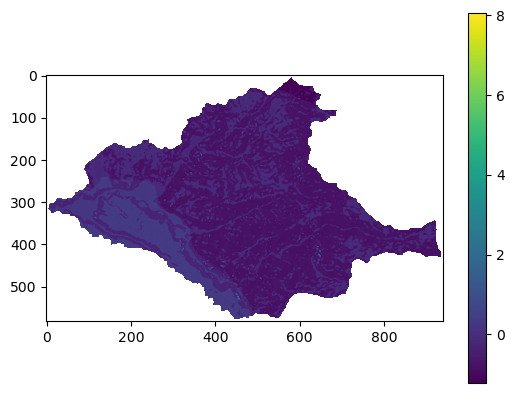

In [99]:
IS_Bi_PE=0.3341*pendiente_c+0.12505*aspecto_c+0.12505*geologia_c+0.0534*elevacion_c+0.3341*curvatura_c

plt.imshow(IS_Bi_PE);
plt.colorbar();

In [100]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS_Bi_PE.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS_Bi_PE,1);

## EVALUACIÓN DEL MODELO PESO DE LA EVIDENCIA

(259233,)

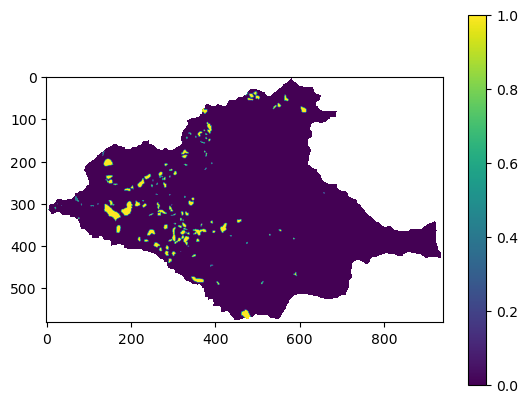

In [101]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [102]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'curvatura':curvatura_vector_MenM, 'elevacion': elevacion_vector_MenM}
df2 = pd.DataFrame(d)
X=df2.drop("inventario", axis=1)
y=df2['inventario']
X.head()

pendiente     aspecto  geologia  curvatura  elevacion
0   7.825526  194.036240       3.0      -0.64      763.0
1   8.447319  170.960526       3.0      -1.28      763.0
2   8.778080  212.660919       3.0       1.92      762.0
3   6.302977  185.194427       3.0       0.64      762.0
4   4.714065  194.036240       3.0      -0.00      762.0

In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [104]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (207386, 5)
Tamaño de labels de entrenamiento: (207386,)
Tamaño de variables de validación: (51847, 5)
Tamaño de labels de validación: (51847,)


In [105]:
result=model.fit(x_train,y_train)

In [106]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [107]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[200138,   1302],
       [   843,   5103]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    201440
         1.0       0.80      0.86      0.83      5946

    accuracy                           0.99    207386
   macro avg       0.90      0.93      0.91    207386
weighted avg       0.99      0.99      0.99    207386



Text(0.7, 0.1, 'AUC=0.996%')

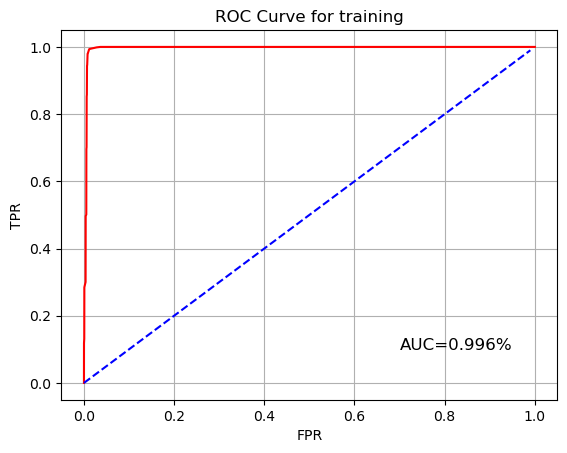

In [110]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [111]:
confusion_matrix(y_test, y_val_pred)

array([[49851,   475],
       [ 1179,   342]], dtype=int64)

In [112]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     50326
         1.0       0.42      0.22      0.29      1521

    accuracy                           0.97     51847
   macro avg       0.70      0.61      0.64     51847
weighted avg       0.96      0.97      0.96     51847



Text(0.7, 0.1, 'AUC=0.841%')

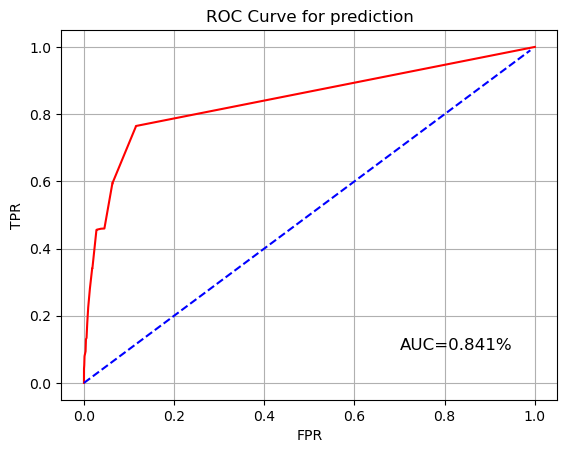

In [113]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [114]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
elevacion_vector2=np.nan_to_num(elevacion_vector)

f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2, 'elevacion':elevacion_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente  aspecto  geologia  curvatura  elevacion
0             0.0      0.0       0.0        0.0        0.0
1             0.0      0.0       0.0        0.0        0.0
2             0.0      0.0       0.0        0.0        0.0
3             0.0      0.0       0.0        0.0        0.0
4             0.0      0.0       0.0        0.0        0.0
...           ...      ...       ...        ...        ...
547657        0.0      0.0       0.0        0.0        0.0
547658        0.0      0.0       0.0        0.0        0.0
547659        0.0      0.0       0.0        0.0        0.0
547660        0.0      0.0       0.0        0.0        0.0
547661        0.0      0.0       0.0        0.0        0.0

[547662 rows x 5 columns]

In [115]:
y_pred=model.predict_proba(x_map)[:,1]

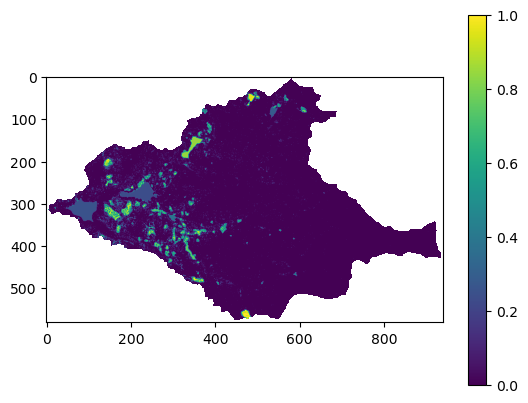

In [116]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

# MÉTODOS ESTÁDISTICOS MULTIVARIADOS

## Regresión Logística

(259233,)

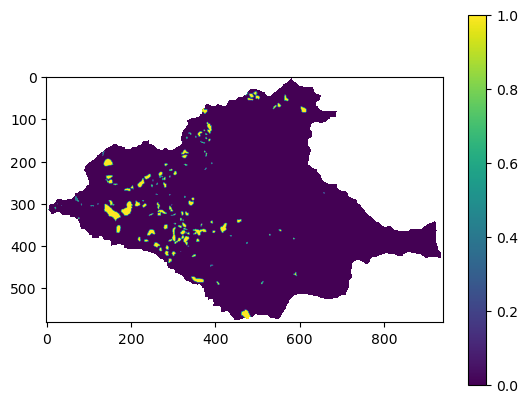

In [117]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [118]:
d1={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'curvatura':curvatura_vector_MenM}
df0 = pd.DataFrame(d1)
print(list(df0.columns))

['inventario', 'pendiente', 'aspecto', 'geologia', 'curvatura']


In [119]:
#Normalizamos las varibles de la data frame
var_names2=['aspecto','pendiente', 'curvatura']
for var in var_names2:
    df0[var]=(df0[var]-df0[var].mean())/df0[var].std()
df0.head()

inventario  pendiente   aspecto  geologia  curvatura
0         0.0  -1.079078 -0.044614       3.0  -0.444951
1         0.0  -1.021525 -0.254136       3.0  -0.894841
2         0.0  -0.990910  0.124493       3.0   1.354610
3         0.0  -1.220003 -0.124896       3.0   0.454829
4         0.0  -1.367071 -0.044614       3.0   0.004939

In [120]:
print(df0.columns)

Index(['inventario', 'pendiente', 'aspecto', 'geologia', 'curvatura'], dtype='object')


In [121]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + C(geologia) + aspecto + curvatura", data = df0).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.118485
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               259233
Model:                          Logit   Df Residuals:                   259227
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                 0.09249
Time:                        19:48:44   Log-Likelihood:                -30715.
converged:                       True   LL-Null:                       -33846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6323      0.020   -131.021      0.000      -2.672      -2.593
C(ge

In [122]:
X=df0.drop("inventario", axis=1)
y=df0['inventario']
X.head()

pendiente   aspecto  geologia  curvatura
0  -1.079078 -0.044614       3.0  -0.444951
1  -1.021525 -0.254136       3.0  -0.894841
2  -0.990910  0.124493       3.0   1.354610
3  -1.220003 -0.124896       3.0   0.454829
4  -1.367071 -0.044614       3.0   0.004939

In [123]:
dummy_geologia=pd.get_dummies(X['geologia'],prefix='geo')
column_name=X.columns.values.tolist()
column_name.remove('geologia')
X1=X[column_name].join(dummy_geologia)
X1.head()

pendiente   aspecto  curvatura  geo_1.0  geo_2.0  geo_3.0
0  -1.079078 -0.044614  -0.444951        0        0        1
1  -1.021525 -0.254136  -0.894841        0        0        1
2  -0.990910  0.124493   1.354610        0        0        1
3  -1.220003 -0.124896   0.454829        0        0        1
4  -1.367071 -0.044614   0.004939        0        0        1

In [124]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [125]:
result=model.fit(X1,y)
print(result.coef_)

[[-0.4095403  -0.0196024  -0.08747334  2.5560555   1.0492612  -4.2695246 ]]


C:\Users\carol\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\carol\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [126]:
y_pred=result.predict(X1)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [127]:
y_prob=result.predict_proba(X1)
y_prob

array([[0.99594253, 0.00405745],
       [0.99586135, 0.00413862],
       [0.9966651 , 0.0033349 ],
       ...,
       [0.2071743 , 0.7928257 ],
       [0.18351877, 0.81648123],
       [0.20077562, 0.7992244 ]], dtype=float32)

In [128]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

array([0.00405745, 0.00413862, 0.0033349 , ..., 0.7928257 , 0.81648123,
       0.7992244 ], dtype=float32)

In [129]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)

In [130]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
dummy_geologia=pd.get_dummies(x_map['geologia'],prefix='geo')
column_name=x_map.columns.values.tolist()
column_name.remove('geologia')
x_map=x_map[column_name].join(dummy_geologia)
x_map=x_map.drop('geo_0.0',axis=1)

x_map.head()

pendiente  aspecto  curvatura  geo_1.0  geo_2.0  geo_3.0
0        0.0      0.0        0.0        0        0        0
1        0.0      0.0        0.0        0        0        0
2        0.0      0.0        0.0        0        0        0
3        0.0      0.0        0.0        0        0        0
4        0.0      0.0        0.0        0        0        0

In [131]:
y_pred=model.predict_proba(x_map)[:,1]

In [132]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)

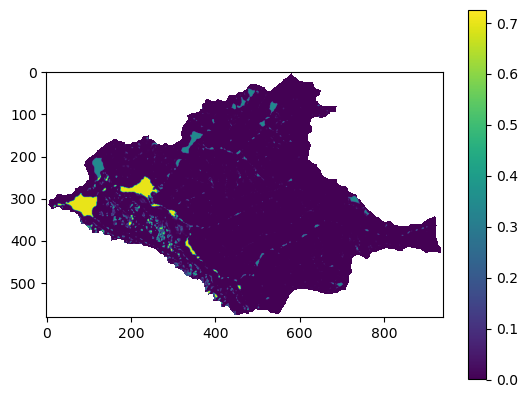

In [133]:
IS_RL=y_pred.reshape(pendiente.shape)
IS_RL=np.where(pendiente<0,np.nan,IS_RL)
plt.imshow(IS_RL)
plt.colorbar();

In [134]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS_RL.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS_RL,1);

## EVALUACIÓN DEL MODELO RL

In [135]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'curvatura':curvatura_vector_MenM}
df2 = pd.DataFrame(d)
X=df2.drop("inventario", axis=1)
y=df2['inventario']
X.head()

pendiente     aspecto  geologia  curvatura
0   7.825526  194.036240       3.0      -0.64
1   8.447319  170.960526       3.0      -1.28
2   8.778080  212.660919       3.0       1.92
3   6.302977  185.194427       3.0       0.64
4   4.714065  194.036240       3.0      -0.00

In [136]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [137]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (207386, 4)
Tamaño de labels de entrenamiento: (207386,)
Tamaño de variables de validación: (51847, 4)
Tamaño de labels de validación: (51847,)


In [138]:
result=model.fit(x_train,y_train)

In [139]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [140]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[177799,  23621],
       [  1286,   4680]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93    201420
         1.0       0.17      0.78      0.27      5966

    accuracy                           0.88    207386
   macro avg       0.58      0.83      0.60    207386
weighted avg       0.97      0.88      0.92    207386



Text(0.7, 0.1, 'AUC=0.9307%')

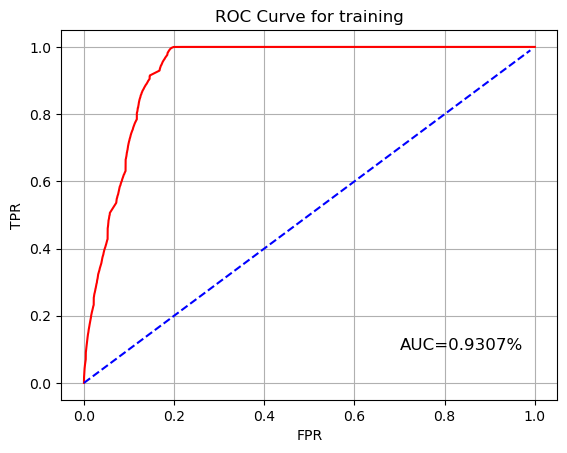

In [143]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [144]:
confusion_matrix(y_test, y_val_pred)

array([[44198,  6148],
       [ 1015,   486]], dtype=int64)

In [145]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     50346
         1.0       0.07      0.32      0.12      1501

    accuracy                           0.86     51847
   macro avg       0.53      0.60      0.52     51847
weighted avg       0.95      0.86      0.90     51847



Text(0.7, 0.1, 'AUC=0.6467%')

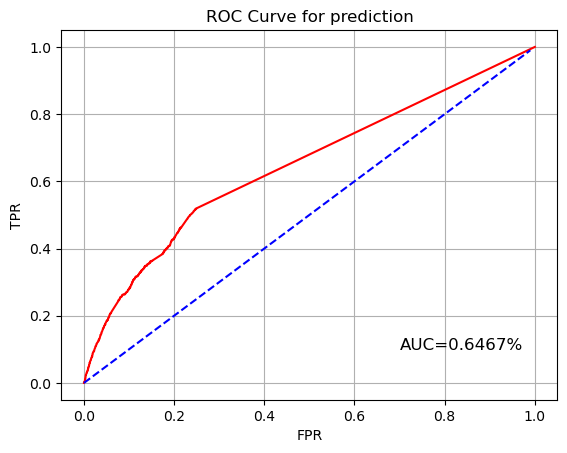

In [146]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [147]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)

f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente  aspecto  geologia  curvatura
0             0.0      0.0       0.0        0.0
1             0.0      0.0       0.0        0.0
2             0.0      0.0       0.0        0.0
3             0.0      0.0       0.0        0.0
4             0.0      0.0       0.0        0.0
...           ...      ...       ...        ...
547657        0.0      0.0       0.0        0.0
547658        0.0      0.0       0.0        0.0
547659        0.0      0.0       0.0        0.0
547660        0.0      0.0       0.0        0.0
547661        0.0      0.0       0.0        0.0

[547662 rows x 4 columns]

In [148]:
y_pred=model.predict_proba(x_map)[:,1]

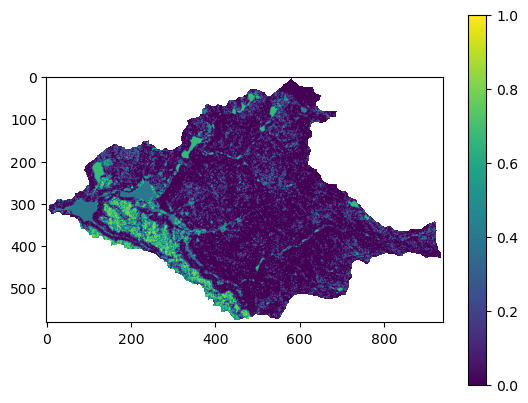

In [149]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

## Support vector machine

In [150]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

In [2]:
df1=df0[(df0["inventario"]==1) | (df0["inventario"]==0).sample(frac=0.01)]
X_01=df1.drop("inventario", axis=1)
y_01=df1['inventario']
df1['inventario'].value_counts()

NameError: name 'df0' is not defined

In [1]:
model.fit(X_01,y_01)

NameError: name 'model' is not defined

In [ ]:
IS_01 = model.predict(x_map)

In [ ]:
IS_01=IS_01.reshape(pendiente.shape)
IS_01=np.where(pendiente<0,np.nan,IS_01)
plt.imshow(IS_01)
plt.colorbar();

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000)

In [ ]:
rf.fit(X_01, y_01);

In [ ]:
IS_01=rf.predict(x_map)

In [ ]:
IS_01=IS_01.reshape(pendiente.shape)
IS_01=np.where(pendiente<0,np.nan,IS_01)
plt.imshow(IS_01)
plt.colorbar();

In [ ]:
print(list(rf.feature_importances_))

## Redes neuronales

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)  # dos capas escondidas, la primera con 5 neuronas y la segunda con dos neuronas
mlp

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_01)
X_trans = scaler.transform(X_01)

In [ ]:
mlp.fit(X_01,y_01)

In [ ]:
IS=mlp.predict(x_map)

In [ ]:
IS_01=IS_01.reshape(pendiente.shape)
IS_01=np.where(pendiente<0,np.nan,IS_01)
plt.imshow(IS_01)
plt.colorbar();

## Análisis discriminante lineal

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA

In [ ]:
model = LDA.fit(X,y)

In [ ]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
x_map

In [ ]:
IS=model.predict(x_map)

In [ ]:
IS=IS.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

# MÉTODOS FÍSICOS

## Modelo SHALSTAB

In [76]:
np.unique(geologia)

# 1 es Abanico Aluvial
# 2 es Basaltos y andesitas
# 3 es Rocas ultramáficas (dunita, harzburguiras, websteritas y otras)

array([ 1.,  2.,  3., nan])

[24. 32. 35. nan]


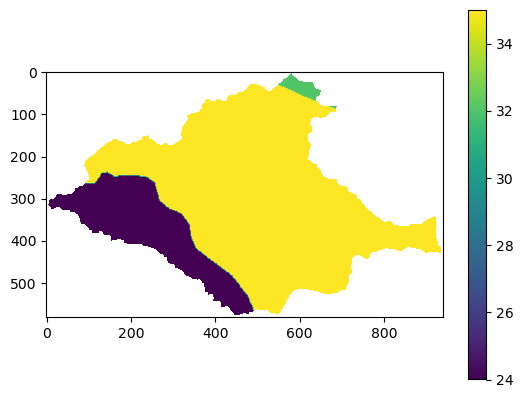

In [77]:
cohesion=np.where ( geologia==1,24,geologia )
cohesion=np.where ( cohesion==2,35,cohesion )
cohesion=np.where ( cohesion==3,32,cohesion )

plt.imshow(cohesion)
plt.colorbar()
print(np.unique(cohesion));

[16.7 26.  28.   nan]


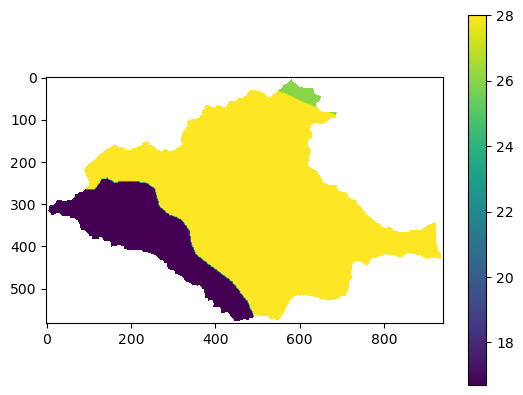

In [78]:
W=np.where ( geologia==1,16.7,geologia )
W=np.where ( W==2,28,W )
W=np.where ( W==3,26,W )

plt.imshow(W)
plt.colorbar()
print(np.unique(W));

[0.575959 0.698132 0.733038      nan]


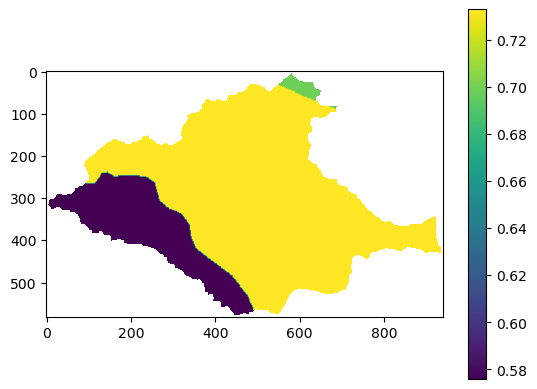

In [79]:
friccion=np.where ( geologia==1,0.575959,geologia )
friccion=np.where ( friccion==2,0.733038,friccion )
friccion=np.where ( friccion==3,0.698132,friccion )

plt.imshow(friccion)
plt.colorbar()
print(np.unique(friccion));

[0.036 0.07  0.087   nan]


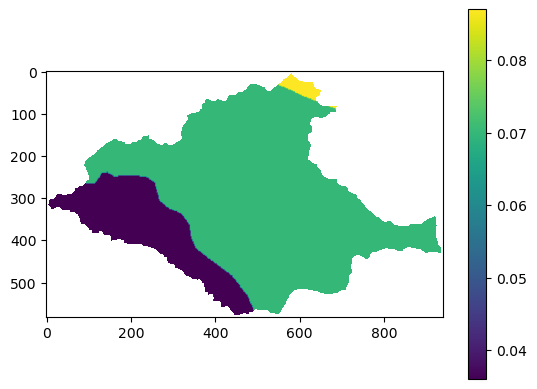

In [80]:
ks=np.where ( geologia==1,0.036,geologia )
ks=np.where ( ks==2,0.070,ks )
ks=np.where ( ks==3,0.087,ks )

plt.imshow(ks)
plt.colorbar()
print(np.unique(ks));

[ 2.         4.2359314  4.2497406 ... 14.97129   15.               nan]


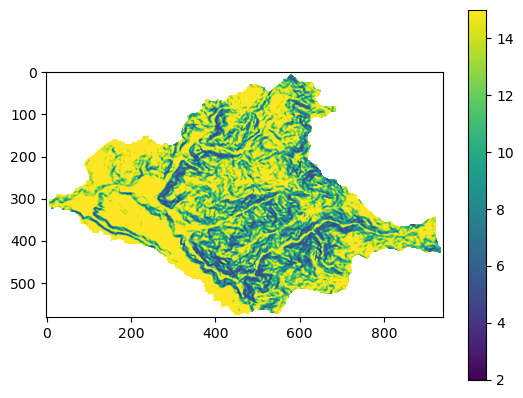

In [81]:
espesor= np.where(pendiente<15, 15, np.where ( (np.logical_and (pendiente>=15, pendiente<40 )),(pendiente*-0.43)+21.43,pendiente))
espesor= np.where ( (np.logical_and (espesor>=40, espesor<60 )),5,espesor)
espesor= np.where (espesor>60, 2, espesor)

plt.imshow(espesor)
plt.colorbar()
print(np.unique(espesor));

In [83]:
Coh10=np.where(cohesion==cohesion[0,0],np.nan,cohesion)
Fri10=np.where(friccion==friccion[0,0],np.nan,friccion)
Per10=np.where(ks==ks[0,0],np.nan,ks)
Pes10=np.where(W==W[0,0],np.nan,W)
FA=flujo*25
FA10=np.where(FA==FA[0,0],np.nan,FA)
S=pendiente*3.1415926/180
Slp10=np.where(S==S[0,0],np.nan,S)
Esp10=np.where(espesor==espesor[0,0],np.nan,espesor)

In [84]:
GammaW   = 9.81 #peso unitario del agua [kN/m3]
dx = 12.5 # resolucion espacial del raster [m]
q = 30 #intensidad de la precipitacion [mm/h]

In [85]:
MatEst = np.zeros(pendiente.shape)
Matq   = np.zeros(pendiente.shape)

M4=FA10/dx
M5=((0.01 * Per10 * (Esp10 * np.cos(Slp10)) * np.sin(Slp10)) / (0.001*q)) * ((Pes10 / GammaW) * (1 - np.tan(Slp10) / np.tan(Fri10)) + (Coh10 / (GammaW * Esp10 * np.cos(Slp10)**2 * np.tan(Fri10))))
MatEst1=np.where(M4>M5,3,MatEst) #  unstable

MatEst2=np.where(M4<=M5,4,MatEst1) # Stable

M1=np.tan(Slp10)
M2=(1 - (GammaW/Pes10)) * np.tan(Fri10) + (Coh10 / (Pes10 * Esp10 * np.cos(Slp10)**2))
MatEst3  =np.where(M1<M2,1,MatEst2) # Unconditionally stable

M3=np.tan(Fri10) + (Coh10 / (Pes10 * Esp10 * np.cos(Slp10)**2))
MatEst4  =  np.where(M1>=M3,2,MatEst3) # Unconditionally Unstable

Matq = (1000 * 0.01 * Per10 * Esp10 * np.cos(Slp10) * np.sin(Slp10)) * (dx / FA10) * ((Pes10 / GammaW) * (1 - (np.tan(Slp10) / np.tan(Fri10))) + Coh10 / (GammaW * Esp10 * np.cos(Slp10)**2 * np.tan(Fri10)))
np.nanmin(Matq)

MatEst=np.where(MatEst4 == 0, np.nan,MatEst4)
Matq=np.where(Matq==np.inf,np.nanmax(Matq[Matq!=np.inf]),Matq)

Matq = np.where(M1<M2,-1,np.where(M1>=M3,-2,Matq))

C:\Users\carol\AppData\Local\Temp\ipykernel_23104\2423321727.py:17: RuntimeWarning: divide by zero encountered in divide
  Matq = (1000 * 0.01 * Per10 * Esp10 * np.cos(Slp10) * np.sin(Slp10)) * (dx / FA10) * ((Pes10 / GammaW) * (1 - (np.tan(Slp10) / np.tan(Fri10))) + Coh10 / (GammaW * Esp10 * np.cos(Slp10)**2 * np.tan(Fri10)))
C:\Users\carol\AppData\Local\Temp\ipykernel_23104\2423321727.py:17: RuntimeWarning: invalid value encountered in multiply
  Matq = (1000 * 0.01 * Per10 * Esp10 * np.cos(Slp10) * np.sin(Slp10)) * (dx / FA10) * ((Pes10 / GammaW) * (1 - (np.tan(Slp10) / np.tan(Fri10))) + Coh10 / (GammaW * Esp10 * np.cos(Slp10)**2 * np.tan(Fri10)))


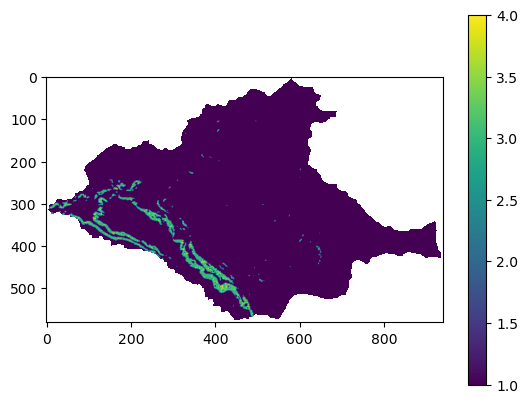

In [86]:
plt.imshow(MatEst)
plt.colorbar()

#estables (celdas con valor de 4)
#inestables (celdas con valor de 3)
#incondicionalmente inestables (celdas con valor de 2)
#incondicionalmente estables (celdas con valor de 1)

In [87]:
with rio.open('MatEst.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(MatEst,1)

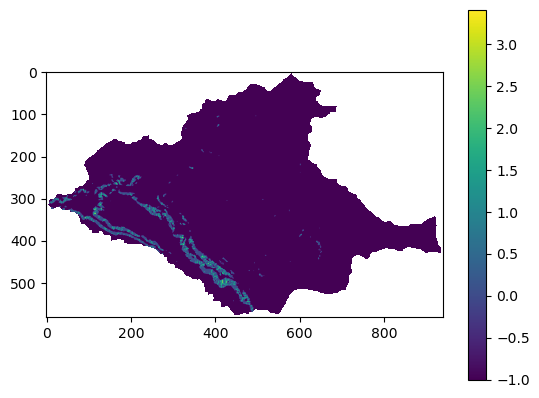

In [88]:
plt.imshow(Matq)
plt.colorbar()

In [89]:
with rio.open('Matq.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Matq,1)  

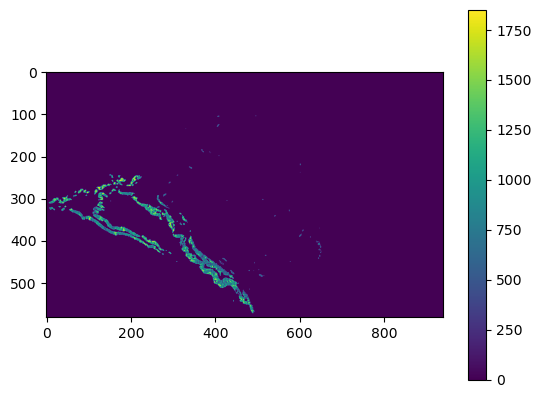

In [90]:
Vol = np.where(np.logical_or(MatEst==2, MatEst==3), espesor*12.5*12.5, 0)

with rio.open('VolMF.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Vol,1) 

plt.imshow(Vol)
plt.colorbar()

## EVALUACIÓN MODELO SHALSTAB

In [91]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'curvatura':curvatura_vector_MenM}
df2 = pd.DataFrame(d)
X=df2.drop("inventario", axis=1)
y=df2['inventario']
X.head()

pendiente     aspecto  geologia  curvatura
0   7.825526  194.036240       3.0      -0.64
1   8.447319  170.960526       3.0      -1.28
2   8.778080  212.660919       3.0       1.92
3   6.302977  185.194427       3.0       0.64
4   4.714065  194.036240       3.0      -0.00

In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [93]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (207386, 4)
Tamaño de labels de entrenamiento: (207386,)
Tamaño de variables de validación: (51847, 4)
Tamaño de labels de validación: (51847,)


In [94]:
result=model.fit(x_train,y_train)

In [95]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [96]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[177201,  24163],
       [  1223,   4799]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93    201364
         1.0       0.17      0.80      0.27      6022

    accuracy                           0.88    207386
   macro avg       0.58      0.84      0.60    207386
weighted avg       0.97      0.88      0.91    207386



Text(0.7, 0.1, 'AUC=0.9304%')

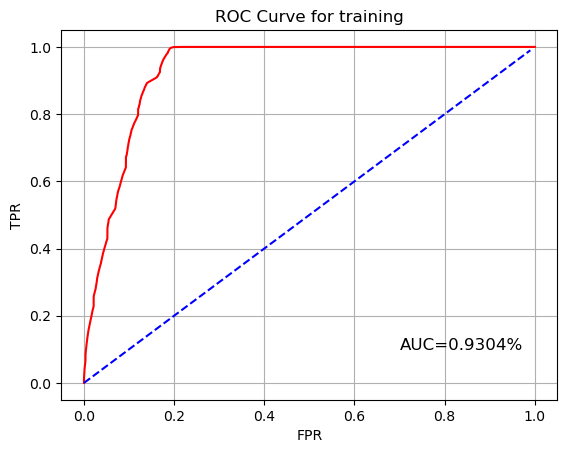

In [99]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [100]:
confusion_matrix(y_test, y_val_pred)

array([[44154,  6248],
       [  959,   486]], dtype=int64)

In [101]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92     50402
         1.0       0.07      0.34      0.12      1445

    accuracy                           0.86     51847
   macro avg       0.53      0.61      0.52     51847
weighted avg       0.95      0.86      0.90     51847



Text(0.7, 0.1, 'AUC=0.657%')

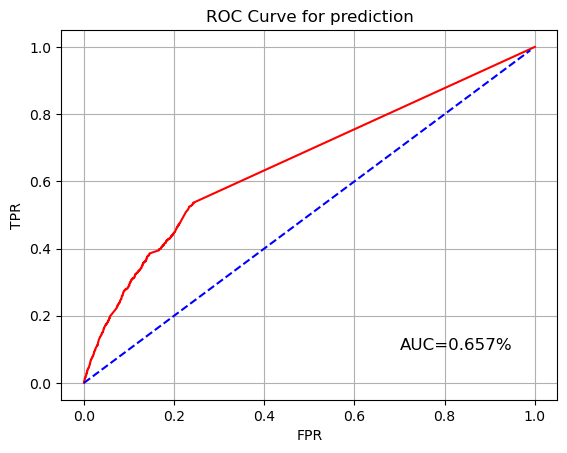

In [102]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [103]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)

f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente  aspecto  geologia  curvatura
0             0.0      0.0       0.0        0.0
1             0.0      0.0       0.0        0.0
2             0.0      0.0       0.0        0.0
3             0.0      0.0       0.0        0.0
4             0.0      0.0       0.0        0.0
...           ...      ...       ...        ...
547657        0.0      0.0       0.0        0.0
547658        0.0      0.0       0.0        0.0
547659        0.0      0.0       0.0        0.0
547660        0.0      0.0       0.0        0.0
547661        0.0      0.0       0.0        0.0

[547662 rows x 4 columns]

In [104]:
y_pred=model.predict_proba(x_map)[:,1]

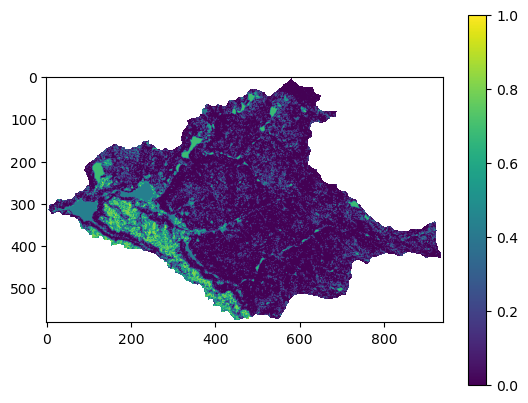

In [105]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();